# Analysing evaluation results for composite reward with CAPPED accum waiting time

In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.max_rows", None)     # Show all rows
pd.set_option("display.max_colwidth", None) # Show full width of columns
pd.set_option("display.width", 1000)        # Set the total width of the terminal output

import sys 
sys.path.append("../")
from data_analysis_functions import generate_summary_df_from_csv, get_df_from_csv, get_trained_and_fixed_from_csv # type: ignore

figsize = (10,6)

In [11]:
# sys.path.remove("data_analysis_after_train")
TRAINED_CHECKPOINT_PATHS = ["reward_experiments/2x2grid/combined_reward_with_queue_length/EVALUATION/PPO_2024-05-06_11_39__alpha_0.45",
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-17_12_05__alpha_0.6", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-17_14_43__alpha_0.8", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-17_15_54__alpha_0.7", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-17_17_47__alpha_0.65",
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-17_18_55__alpha_0.75", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-17_19_57__alpha_0.9", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-17_21_00__alpha_1", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-17_21_58__alpha_1.1", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-18_11_46__alpha_0.6",
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-18_15_47__alpha_1.5",
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-18_17_19__alpha_2",
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-18_19_58__delta_wait_time_reward_capped", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-18_20_46__alpha_3", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-18_23_01__alpha_5", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-20_09_18__alpha_10",
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-20_10_39__alpha_1_reduced_observation_space",
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-20_13_16__alpha_1_single_observ", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-16_09_54__alpha_0_from_2x2_diff_acc"
                            ]

TRAINED_CHECKPOINT_PATHS_ABS = [os.path.join("/Users/loveen/Desktop/Masters project/rl-multi-agent-traffic-nonexhaust-emissions-clean", x) for x in TRAINED_CHECKPOINT_PATHS]

In [12]:
def concaten_alpha_tuning_summary_for_specific_seed(seed):
    '''
    Takes in a seed, and calls the generate summary dataframe. 
    '''

    fixed_tc_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[0], 
                                    eval_dir = "fixed_tc", 
                                    df_row_label = "fixed_tc",
                                    seed = seed)
    # trained_0_6_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[1], 
    #                                 eval_dir = "trained", 
    #                                 df_row_label = "alpha_0_6",
    #                                 seed = seed)
    trained_0_8_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[2], 
                                    eval_dir = "trained", 
                                    df_row_label = "alpha_0_8",
                                    seed = seed)
    trained_0_7_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[3], 
                                    eval_dir = "trained", 
                                    df_row_label = "alpha_0_7",
                                    seed = seed)
    trained_0_65_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[4], 
                                eval_dir = "trained", 
                                df_row_label = "alpha_0_65",
                                seed = seed)
    trained_0_75_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[5], 
                                eval_dir = "trained", 
                                df_row_label = "alpha_0_75",
                                seed = seed)
    trained_0_9_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[6], 
                                eval_dir = "trained", 
                                df_row_label = "alpha_0_9",
                                seed = seed)
    trained_1_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[7], 
                                eval_dir = "trained", 
                                df_row_label = "alpha_1",
                                seed = seed)
    trained_1_1_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[8], 
                            eval_dir = "trained", 
                            df_row_label = "alpha_1_1",
                            seed = seed)
    trained_0_6_constant_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[9], # this is with constant conditions! 
                            eval_dir = "trained", 
                            df_row_label = "alpha_0_6",
                            seed = seed)
    trained_1_5_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[10], 
                            eval_dir = "trained", 
                            df_row_label = "alpha_1_5",
                            seed = seed)
    trained_2_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[11], 
                            eval_dir = "trained", 
                            df_row_label = "alpha_2",
                            seed = seed)
    trained_delta_wait_time_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[12], 
                            eval_dir = "trained", 
                            df_row_label = "trained_delta_wait_time",
                            seed = seed)
    trained_3_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[13], 
                            eval_dir = "trained", 
                            df_row_label = "alpha_3",
                            seed = seed)
    trained_5_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[14], 
                            eval_dir = "trained", 
                            df_row_label = "alpha_5",
                            seed = seed)
    trained_10_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[15], 
                            eval_dir = "trained", 
                            df_row_label = "alpha_10",
                            seed = seed)
    trained_0_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[18], 
                            eval_dir = "trained", 
                            df_row_label = "alpha_0",
                            seed = seed)
    
    alpha_tuning_experiment_df = pd.concat([fixed_tc_df,
                                    #  trained_0_6_df,
                                     trained_0_df,
                                     trained_0_6_constant_df,
                                     trained_0_65_df,
                                     trained_0_7_df,
                                     trained_0_75_df,
                                     trained_0_8_df,
                                     trained_0_9_df,
                                     trained_1_df,
                                     trained_1_1_df, 
                                     trained_1_5_df,
                                     trained_2_df,
                                     trained_3_df,
                                     trained_5_df,
                                     trained_10_df,
                                     trained_delta_wait_time_df], axis=0)
    return alpha_tuning_experiment_df

def concaten_reducing_obs_investigation_summary_for_specific_seed(seed):
    '''
    Takes in a seed, and calls the generate summary dataframe. 
    '''
    fixed_tc_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[0], 
                                    eval_dir = "fixed_tc", 
                                    df_row_label = "fixed_tc",
                                    seed = seed)
    
    trained_1_reduced_obs_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[16], 
                            eval_dir = "trained", 
                            df_row_label = "alpha_1_reduced_observations",
                            seed = seed)
    trained_1_single_obs_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[17], 
                            eval_dir = "trained", 
                            df_row_label = "alpha_1_single_obs",
                            seed = seed)
    trained_1_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[7], 
                                eval_dir = "trained", 
                                df_row_label = "alpha_1",
                                seed = seed)
    trained_delta_wait_time_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[12], 
                            eval_dir = "trained", 
                            df_row_label = "trained_delta_wait_time",
                            seed = seed)
    reducing_obs_experiment_df = pd.concat([fixed_tc_df,
                                    trained_1_df,
                                    trained_1_reduced_obs_df,
                                    trained_1_single_obs_df, 
                                    trained_delta_wait_time_df], axis=0)
    return reducing_obs_experiment_df

## GENERAL INSPECTION

In [13]:
SUMO_SEEDS = [10, 15, 22, 31, 55, 39, 83, 49, 51, 74]
SUMO_SEEDS = [10, 22, 39, 31, 55]

SUMO_SEEDS = [10, 15, 22, 31, 55, 39, 83, 49, 51, 74]

alpha_dfs = [concaten_alpha_tuning_summary_for_specific_seed(seed) for seed in SUMO_SEEDS]

# Step 2: Concatenate them along the row axis
alpha_df_combined = pd.concat(alpha_dfs, axis=0, ignore_index=False)

In [14]:
# Step 3: Compute the mean for each row
df_average_whole_experiment = alpha_df_combined.groupby(alpha_df_combined.index).mean()

In [15]:
df_average_whole_experiment_ordered = df_average_whole_experiment.reindex([
                                         'alpha_0',
                                         'alpha_0_6', 
                                         'alpha_0_65', 
                                         "alpha_0_7", 
                                         "alpha_0_75", 
                                         "alpha_0_8",
                                         "alpha_0_9", 
                                         "alpha_1",
                                         "alpha_1_1",
                                         "alpha_1_5", 
                                         "alpha_2",
                                         "alpha_3",
                                         "alpha_5",
                                         "alpha_10",
                                         "trained_delta_wait_time",
                                         "fixed_tc"])

In [16]:
df_average_whole_experiment_system_wide = df_average_whole_experiment_ordered[
                            ["sys_avg_waiting_time_episode_mean",
                             "sys_abs_accel_episode_mean", 
                             "sys_abs_accel_episode_sum", 
                             "sys_abs_accel_episode_ms"]]
df_average_whole_experiment_system_wide

,sys_avg_waiting_time_episode_mean,sys_abs_accel_episode_mean,sys_abs_accel_episode_sum,sys_abs_accel_episode_ms
alpha_0,181912.78146,0.212633,1063.166221,1.813039
alpha_0_6,87699.01338,3.693141,18465.705141,18.003328
alpha_0_65,45494.55906,9.198085,45990.423821,106.200899
alpha_0_7,188.94556,17.105089,85525.445560,343.916688
alpha_0_75,9.03446,14.326129,71630.646232,242.326629
alpha_0_8,9.01960,14.572935,72864.676539,250.586062
alpha_0_9,9.23666,14.229593,71147.965648,239.221218
alpha_1,9.10878,14.316728,71583.638998,242.049164
alpha_1_1,8.73830,14.486259,72431.294138,248.279519
alpha_1_5,7.90204,14.503914,72519.567722,248.124713


In [17]:
df_average_whole_experiment_agent_wide = df_average_whole_experiment_ordered[
                            ["1_abs_accel_mean",
                             '1_abs_accel_sum',
                             "1_accumulated_waiting_time_mean",
                             "1_accumulated_waiting_time_sum",

                             '2_abs_accel_mean',
                             '2_abs_accel_sum', 
                             "2_accumulated_waiting_time_mean",

                             '5_abs_accel_mean', 
                             '5_abs_accel_sum',
                             "5_accumulated_waiting_time_mean",

                             '6_abs_accel_mean', 
                             '6_abs_accel_sum',
                             "6_accumulated_waiting_time_mean"]]
df_average_whole_experiment_agent_wide

,1_abs_accel_mean,1_abs_accel_sum,1_accumulated_waiting_time_mean,1_accumulated_waiting_time_sum,2_abs_accel_mean,2_abs_accel_sum,2_accumulated_waiting_time_mean,5_abs_accel_mean,5_abs_accel_sum,5_accumulated_waiting_time_mean,6_abs_accel_mean,6_abs_accel_sum,6_accumulated_waiting_time_mean
alpha_0,0.105516,527.581290,33414.56000,167072800.0,0.053358,266.791448,16705.12000,0.053153,265.765307,16639.80000,0.000000,0.000000,0.00000
alpha_0_6,0.638240,3191.199015,16609.71822,83048591.1,0.525687,2628.435987,-1.30714,0.591007,2955.036451,16639.80128,0.513893,2569.465045,0.00104
alpha_0_65,0.562318,2811.588977,16692.12110,83460605.5,0.509917,2549.584474,0.00000,2.321880,11609.399084,3.32852,2.333735,11668.677273,2.47518
alpha_0_7,5.940584,29702.918651,1099.48436,5497421.8,1.989236,9946.180752,1.99324,2.326287,11631.436892,2.99182,2.323613,11618.063839,2.37974
alpha_0_75,2.419086,12095.431310,3.55070,17753.5,2.360381,11801.904737,2.26472,2.395851,11979.254146,2.50036,2.305183,11525.916229,1.80944
alpha_0_8,2.481054,12405.269981,3.48508,17425.4,2.402589,12012.946810,2.39304,2.419250,12096.250778,2.48808,2.346020,11730.101005,1.84964
alpha_0_9,2.379533,11897.665929,3.21970,16098.5,2.354611,11773.057182,2.69752,2.370825,11854.122763,2.31218,2.277847,11389.236877,2.05916
alpha_1,2.372947,11864.732641,3.58594,17929.7,2.380777,11903.885354,2.44788,2.413197,12065.982596,2.26092,2.274929,11374.644871,1.86896
alpha_1_1,2.369993,11849.962835,3.40882,17044.1,2.401050,12005.251565,2.37810,2.397890,11989.447941,2.08280,2.371823,11859.113287,1.87766
alpha_1_5,2.350484,11752.417587,3.06170,15308.5,2.441901,12209.506386,2.14286,2.406064,12030.321569,2.08556,2.362299,11811.497396,1.58432


## Plots for report + Appendix

In [18]:
df_system_wide_whole_numbers = df_average_whole_experiment_system_wide.loc[[
                                    "fixed_tc",
                                    "alpha_0",
                                    "alpha_0_9",
                                    "alpha_1",
                                    "alpha_2",
                                    "alpha_3",
                                    "alpha_5",
                                    "alpha_10",
                                    "trained_delta_wait_time"
                                    ], :]
df_system_wide_whole_numbers.loc[:, ["sys_avg_waiting_time_episode_mean",
                                     'sys_abs_accel_episode_sum',
                                     'sys_abs_accel_episode_mean',
                                     "sys_abs_accel_episode_ms"]]

,sys_avg_waiting_time_episode_mean,sys_abs_accel_episode_sum,sys_abs_accel_episode_mean,sys_abs_accel_episode_ms
fixed_tc,227.54018,84389.056214,16.877811,342.624088
alpha_0,181912.78146,1063.166221,0.212633,1.813039
alpha_0_9,9.23666,71147.965648,14.229593,239.221218
alpha_1,9.10878,71583.638998,14.316728,242.049164
alpha_2,7.30794,76011.089951,15.202218,269.533767
alpha_3,6.78498,74409.058196,14.881812,260.609274
alpha_5,6.13562,75851.821024,15.170364,269.317570
alpha_10,5.29154,84246.711945,16.849342,325.628787
trained_delta_wait_time,4.84860,83435.067320,16.687013,320.155417


## Original graph before any transformations

/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_13865/604057642.py:51: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax1.set_ylim(0, df_system_wide_whole_numbers['sys_avg_waiting_time_episode_mean'].max() + 2)
/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_13865/604057642.py:52: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax2.set_ylim(0, df_system_wide_whole_numbers['sys_abs_accel_episode_mean'].max() + 2)


<Figure size 1000x600 with 0 Axes>

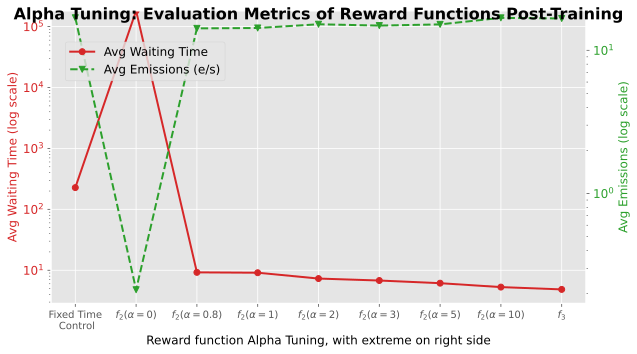

In [19]:
import matplotlib.pyplot as plt

# Create a larger figure to improve readability
plt.figure(figsize=figsize)
plt.style.use('ggplot')

# Plot the first series with the first y-axis
fig, ax1 = plt.subplots(figsize=(9, 5))
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'

# Plot the first series (avg waiting time) with a logarithmic y-axis
ax1.plot(df_system_wide_whole_numbers.index, df_system_wide_whole_numbers['sys_avg_waiting_time_episode_mean'], 
         color='tab:red', label='Avg Waiting Time', linewidth=2, linestyle='-', marker='o')
ax1.set_xlabel('Reward function Alpha Tuning, with extreme on right side', fontsize=12)
ax1.set_ylabel('Avg Waiting Time (log scale)', fontsize=12, color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red', labelsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.grid(True)
ax1.set_yscale('log')

# Plot the second series (absolute acceleration) on a second y-axis with a logarithmic scale
ax2 = ax1.twinx()
ax2.plot(df_system_wide_whole_numbers.index, df_system_wide_whole_numbers['sys_abs_accel_episode_mean'], 
         color='tab:green', label='Avg Emissions (e/s)', linewidth=2, linestyle='--', marker='v')
ax2.set_ylabel('Avg Emissions (log scale)', fontsize=12, color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green', labelsize=12)
ax2.grid(False)  # Avoid double grid lines
ax2.set_yscale('log')

new_labels = [
    'Fixed Time\n Control',
    r'$f_2(\alpha=0)$',
    r'$f_2(\alpha=0.8)$',
    r'$f_2(\alpha=1)$',
    r'$f_2(\alpha=2)$',
    r'$f_2(\alpha=3)$',
    r'$f_2(\alpha=5)$',
    r'$f_2(\alpha=10)$',
    '$f_3$'
]
ax1.set_xticks(range(len(df_system_wide_whole_numbers.index)))
ax1.set_xticklabels(new_labels, fontsize=10)

# Adding legends to the plots
fig.tight_layout()
fig.suptitle('Alpha Tuning: Evaluation Metrics of Reward Functions Post-Training', fontsize=16, fontweight='bold')
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9), fontsize=12)

# Adjust y-axis limits to make sure all data points are visible
ax1.set_ylim(0, df_system_wide_whole_numbers['sys_avg_waiting_time_episode_mean'].max() + 2)
ax2.set_ylim(0, df_system_wide_whole_numbers['sys_abs_accel_episode_mean'].max() + 2)

# Show the plot
plt.show()

## Graph with alpha = 0.8

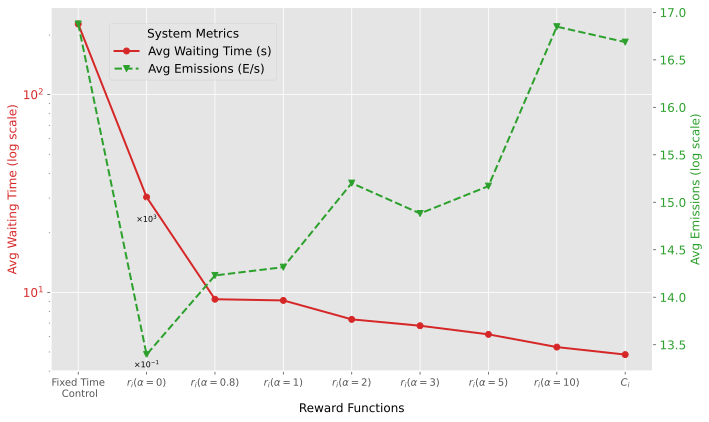

In [20]:
import matplotlib.pyplot as plt
import numpy as np

line_width = 2

# Create a copy of the dataframe to manipulate the values for plotting
df_plot = df_system_wide_whole_numbers.copy()

# Apply specific transformations for alpha = 0
df_plot.at['alpha_0', 'sys_avg_waiting_time_episode_mean'] /= 6000  # Scale down by dividing by 1000
df_plot.at['alpha_0', 'sys_abs_accel_episode_mean'] *= 63       # Scale up by multiplying by 50

# Plot the first series with the first y-axis
fig, ax1 = plt.subplots(figsize=figsize)
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'

# Plot the first series (avg waiting time) with a logarithmic y-axis
ax1.plot(df_plot.index, df_plot['sys_avg_waiting_time_episode_mean'], 
         color='tab:red', label='Avg Waiting Time (s)', linewidth=line_width, linestyle='-', marker='o')
ax1.set_xlabel('Reward Functions', fontsize=12)
ax1.set_ylabel('Avg Waiting Time (log scale)', fontsize=12, color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red', labelsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.grid(True)
ax1.set_yscale('log')

# Annotate the scaled value for alpha = 0 for Avg Waiting Time
scaled_waiting_value = df_plot.at['alpha_0', 'sys_avg_waiting_time_episode_mean']
ax1.annotate(r'$\times 10^3$', fontsize=8,
             xy=('alpha_0', scaled_waiting_value),
             xytext=('alpha_0', scaled_waiting_value*0.75),  # Adjust the position of the annotation
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             horizontalalignment='center')

# Plot the second series (absolute acceleration) on a second y-axis with a logarithmic scale
ax2 = ax1.twinx()
ax2.plot(df_plot.index, df_plot['sys_abs_accel_episode_mean'], 
         color='tab:green', label='Avg Emissions (E/s)', linewidth=line_width, linestyle='--', marker='v')
ax2.set_ylabel('Avg Emissions (log scale)', fontsize=12, color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green', labelsize=12)
ax2.grid(False)  # Avoid double grid lines
# ax2.set_yscale()

# Annotate the scaled value for alpha = 0 for Avg Emissions
scaled_emissions_value = df_plot.at['alpha_0', 'sys_abs_accel_episode_mean']
ax2.annotate(r'$\times 10^{-1}$', fontsize=8,
             xy=('alpha_0', scaled_emissions_value),
             xytext=('alpha_0', scaled_emissions_value*0.99),  # Adjust the position of the annotation
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             horizontalalignment='center')

# Change x-axis labels to include alpha sign and expressions
new_labels = [
    'Fixed Time\n Control',
    r'$r_i(\alpha=0)$',
    r'$r_i(\alpha=0.8)$',
    r'$r_i(\alpha=1)$',
    r'$r_i(\alpha=2)$',
    r'$r_i(\alpha=3)$',
    r'$r_i(\alpha=5)$',
    r'$r_i(\alpha=10)$',
    '$C_i$'
]
ax1.set_xticks(range(len(df_plot.index)))
ax1.set_xticklabels(new_labels, fontsize=10)

# Adding legends to the plots
plt.tight_layout(rect=[0, 0, 1, 1])
# fig.suptitle('Alpha Tuning: Evaluation Metrics of Reward Functions Post-Training', fontsize=16, fontweight='bold')
fig.legend(bbox_to_anchor=(0.4, 0.95), fontsize=12, title='System Metrics', title_fontsize=12)

# Show the plot
plt.show()

fig.savefig("images_for_report_2x2/System Metrics across Reward Functions.pdf", dpi=100000000)

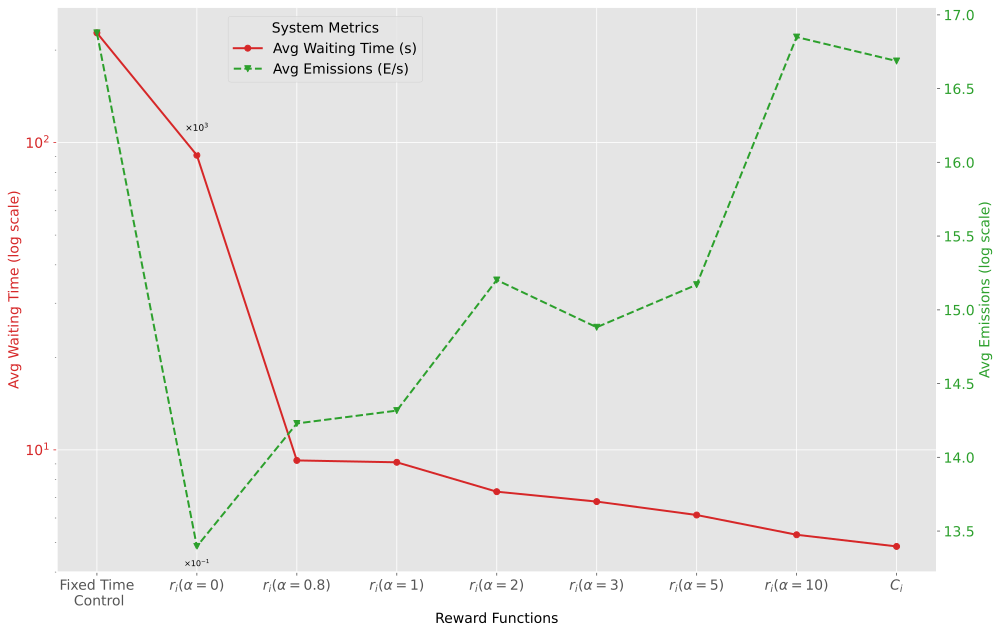

In [31]:
import matplotlib.pyplot as plt
import numpy as np

line_width = 2

# Create a copy of the dataframe to manipulate the values for plotting
df_plot = df_system_wide_whole_numbers.copy()

df_plot.loc['fixed_tc', 'sys_avg_waiting_time_episode_mean']/2

# Apply specific transformations for alpha = 0
df_plot.at['alpha_0', 'sys_avg_waiting_time_episode_mean'] /= 2000  # Scale down by dividing by 1000
df_plot.at['alpha_0', 'sys_abs_accel_episode_mean'] *= 63      # Scale up by multiplying by 50

# Plot the first series with the first y-axis
fig, ax1 = plt.subplots(figsize=(14,9))
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'

# Plot the first series (avg waiting time) with a logarithmic y-axis
ax1.plot(df_plot.index, df_plot['sys_avg_waiting_time_episode_mean'], 
         color='tab:red', label='Avg Waiting Time (s)', linewidth=line_width, linestyle='-', marker='o')
ax1.set_xlabel('Reward Functions', fontsize=14)
ax1.set_ylabel('Avg Waiting Time (log scale)', fontsize=14, color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red', labelsize=14)
ax1.tick_params(axis='x', labelsize=14)
ax1.grid(True)
ax1.set_yscale('log')
ax1.yaxis.set_tick_params(colors='tab:red')

# Annotate the scaled value for alpha = 0 for Avg Waiting Time
scaled_waiting_value = df_plot.at['alpha_0', 'sys_avg_waiting_time_episode_mean']
ax1.annotate(r'$\times 10^3$', fontsize=9,
             xy=('alpha_0', scaled_waiting_value),
             xytext=('alpha_0', scaled_waiting_value*1.2),  # Adjust the position of the annotation
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             horizontalalignment='center')

# Plot the second series (absolute acceleration) on a second y-axis with a logarithmic scale
ax2 = ax1.twinx()
ax2.plot(df_plot.index, df_plot['sys_abs_accel_episode_mean'], 
         color='tab:green', label='Avg Emissions (E/s)', linewidth=line_width, linestyle='--', marker='v')
ax2.set_ylabel('Avg Emissions (log scale)', fontsize=14, color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green', labelsize=14)
ax2.grid(False)  # Avoid double grid lines
# ax2.set_yscale()

# Annotate the scaled value for alpha = 0 for Avg Emissions
scaled_emissions_value = df_plot.at['alpha_0', 'sys_abs_accel_episode_mean']
ax2.annotate(r'$\times 10^{-1}$', fontsize=8,
             xy=('alpha_0', scaled_emissions_value),
             xytext=('alpha_0', scaled_emissions_value*0.99),  # Adjust the position of the annotation
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             horizontalalignment='center')

# Change x-axis labels to include alpha sign and expressions
new_labels = [
    'Fixed Time\n Control',
    r'$r_i(\alpha=0)$',
    r'$r_i(\alpha=0.8)$',
    r'$r_i(\alpha=1)$',
    r'$r_i(\alpha=2)$',
    r'$r_i(\alpha=3)$',
    r'$r_i(\alpha=5)$',
    r'$r_i(\alpha=10)$',
    '$C_i$'
]
ax1.set_xticks(range(len(df_plot.index)))
ax1.set_xticklabels(new_labels, fontsize=14)

# Adding legends to the plots
plt.tight_layout(rect=[0, 0, 1, 0.99])
# fig.suptitle('Alpha Tuning: Evaluation Metrics of Reward Functions Post-Training', fontsize=16, fontweight='bold')
fig.legend(bbox_to_anchor=(0.43, 0.97), fontsize=14, title='System Metrics', title_fontsize=14)

# Show the plot
plt.show()

fig.savefig("images_for_report_2x2/System Metrics across Reward Functions.pdf", dpi=100000000)

'Alpha Tuning: Evaluation Metrics of Reward Functions Post-Training'

In [13]:
df_system_wide_whole_numbers

,sys_avg_waiting_time_episode_mean,sys_abs_accel_episode_mean,sys_abs_accel_episode_sum,sys_abs_accel_episode_ms
fixed_tc,227.54018,16.877811,84389.056214,342.624088
alpha_0,181912.78146,0.212633,1063.166221,1.813039
alpha_0_9,9.23666,14.229593,71147.965648,239.221218
alpha_1,9.10878,14.316728,71583.638998,242.049164
alpha_2,7.30794,15.202218,76011.089951,269.533767
alpha_3,6.78498,14.881812,74409.058196,260.609274
alpha_5,6.13562,15.170364,75851.821024,269.317570
alpha_10,5.29154,16.849342,84246.711945,325.628787
trained_delta_wait_time,4.84860,16.687013,83435.067320,320.155417


In [14]:
df_system_wide_whole_numbers_for_report = df_average_whole_experiment.loc[[
                                    "fixed_tc",
                                    "alpha_0",
                                    "alpha_0_75",
                                    "alpha_1",
                                    "alpha_2",
                                    "alpha_3",
                                    "alpha_5",
                                    "alpha_10",
                                    "trained_delta_wait_time"
                                    ], 
                                    ["sys_avg_waiting_time_episode_mean", 
                                     "sys_abs_accel_episode_sum", 
                                     "sys_abs_accel_episode_mean"]]
df_system_wide_whole_numbers_for_report

,sys_avg_waiting_time_episode_mean,sys_abs_accel_episode_sum,sys_abs_accel_episode_mean
fixed_tc,227.54018,84389.056214,16.877811
alpha_0,181912.78146,1063.166221,0.212633
alpha_0_75,9.03446,71630.646232,14.326129
alpha_1,9.10878,71583.638998,14.316728
alpha_2,7.30794,76011.089951,15.202218
alpha_3,6.78498,74409.058196,14.881812
alpha_5,6.13562,75851.821024,15.170364
alpha_10,5.29154,84246.711945,16.849342
trained_delta_wait_time,4.84860,83435.067320,16.687013


In [15]:
print(df_system_wide_whole_numbers_for_report.to_latex())

\begin{tabular}{lrrr}
\toprule
 & sys_avg_waiting_time_episode_mean & sys_abs_accel_episode_sum & sys_abs_accel_episode_mean \\
\midrule
fixed_tc & 227.540180 & 84389.056214 & 16.877811 \\
alpha_0 & 181912.781460 & 1063.166221 & 0.212633 \\
alpha_0_75 & 9.034460 & 71630.646232 & 14.326129 \\
alpha_1 & 9.108780 & 71583.638998 & 14.316728 \\
alpha_2 & 7.307940 & 76011.089951 & 15.202218 \\
alpha_3 & 6.784980 & 74409.058196 & 14.881812 \\
alpha_5 & 6.135620 & 75851.821024 & 15.170364 \\
alpha_10 & 5.291540 & 84246.711945 & 16.849342 \\
trained_delta_wait_time & 4.848600 & 83435.067320 & 16.687013 \\
\bottomrule
\end{tabular}



In [16]:
83435.067320 - 71583.638998

11851.428322000007

In [17]:
df_average_whole_experiment_ordered = df_average_whole_experiment.reindex([
                                         'alpha_0',
                                         "alpha_1",
                                         "alpha_1_1",
                                         "alpha_1_5", 
                                         "alpha_2",
                                         "alpha_3",
                                         "alpha_5",
                                         "alpha_10",
                                         "trained_delta_wait_time",
                                         "fixed_tc"])

df_average_whole_experiment_ordered.loc[:,['sys_abs_accel_episode_mean',
                                            'sys_abs_accel_episode_sum',
                                            'sys_abs_accel_episode_var',
                                            'sys_avg_waiting_time_episode_mean'] ]

,sys_abs_accel_episode_mean,sys_abs_accel_episode_sum,sys_abs_accel_episode_var,sys_avg_waiting_time_episode_mean
alpha_0,0.212633,1063.166221,1.768167,181912.78146
alpha_1,14.316728,71583.638998,36.954286,9.10878
alpha_1_1,14.486259,72431.294138,38.241172,8.73830
alpha_1_5,14.503914,72519.567722,37.653258,7.90204
alpha_2,15.202218,76011.089951,38.292418,7.30794
alpha_3,14.881812,74409.058196,38.943134,6.78498
alpha_5,15.170364,75851.821024,39.059595,6.13562
alpha_10,16.849342,84246.711945,41.543411,5.29154
trained_delta_wait_time,16.687013,83435.067320,41.591864,4.84860
fixed_tc,16.877811,84389.056214,57.562304,227.54018


In [18]:
df_average_whole_experiment_agent_wide.to_csv()

',1_abs_accel_mean,1_abs_accel_sum,1_accumulated_waiting_time_mean,1_accumulated_waiting_time_sum,2_abs_accel_mean,2_abs_accel_sum,2_accumulated_waiting_time_mean,5_abs_accel_mean,5_abs_accel_sum,5_accumulated_waiting_time_mean,6_abs_accel_mean,6_abs_accel_sum,6_accumulated_waiting_time_mean\nalpha_0,0.10551625804220759,527.581290211038,33414.56,167072800.0,0.053358289591905174,266.7914479595259,16705.120000000003,0.053153061409919225,265.7653070495961,16639.8,0.0,0.0,0.0\nalpha_0_6,0.6382398029324431,3191.1990146622156,16609.718220000002,83048591.1,0.5256871973863376,2628.435986931688,-1.30714,0.5910072901532637,2955.0364507663185,16639.80128,0.5138930090178323,2569.4650450891613,0.00104\nalpha_0_65,0.5623177953200156,2811.588976600078,16692.1211,83460605.5,0.5099168948468125,2549.5844742340623,0.0,2.3218798167325914,11609.399083662958,3.32852,2.333735454623989,11668.677273119945,2.47518\nalpha_0_7,5.940583730106975,29702.918650534877,1099.48436,5497421.8,1.9892361504133114,9946.18075

## Keep only whole numbers on x axis for consistency! 

<Figure size 1000x600 with 0 Axes>

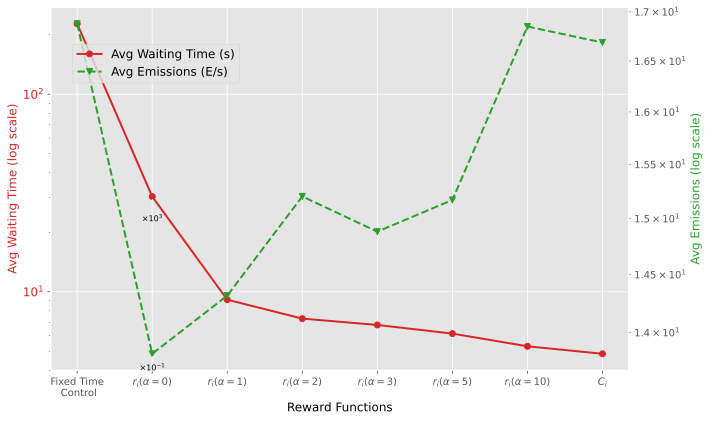

In [19]:
import matplotlib.pyplot as plt
import numpy as np

line_width = 2

# Create a copy of the dataframe to manipulate the values for plotting
df_plot = df_system_wide_whole_numbers.copy()

# df_system_wide_whole_numbers.loc["fixed_tc", "sys_avg_waiting_time_episode_mean"] = 11.51

# Apply specific transformations for alpha = 0
df_plot.at['alpha_0', 'sys_avg_waiting_time_episode_mean'] /= 6000  # Scale down by dividing by 1000
df_plot.at['alpha_0', 'sys_abs_accel_episode_mean'] *= 65    # Scale up by multiplying by 50

df_plot.drop(['alpha_0_9'], inplace=True)

# Create a larger figure to improve readability
plt.figure(figsize=figsize)
plt.style.use('ggplot')

# Plot the first series with the first y-axis
fig, ax1 = plt.subplots(figsize=figsize)
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'

# Plot the first series (avg waiting time) with a logarithmic y-axis
ax1.plot(df_plot.index, df_plot['sys_avg_waiting_time_episode_mean'], 
         color='tab:red', label='Avg Waiting Time (s)', linewidth=line_width, linestyle='-', marker='o')
ax1.set_xlabel('Reward Functions', fontsize=12)
ax1.set_ylabel('Avg Waiting Time (log scale)', fontsize=12, color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red', labelsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.grid(True)
ax1.set_yscale('log')

# Annotate the scaled value for alpha = 0 for Avg Waiting Time
scaled_waiting_value = df_plot.at['alpha_0', 'sys_avg_waiting_time_episode_mean']
ax1.annotate(r'$\times 10^3$', fontsize=8,
             xy=('alpha_0', scaled_waiting_value),
             xytext=('alpha_0', scaled_waiting_value*0.75),  # Adjust the position of the annotation
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             horizontalalignment='center')

# Plot the second series (absolute acceleration) on a second y-axis with a logarithmic scale
ax2 = ax1.twinx()
ax2.plot(df_plot.index, df_plot['sys_abs_accel_episode_mean'], 
         color='tab:green', label='Avg Emissions (E/s)', linewidth=line_width, linestyle='--', marker='v')
ax2.set_ylabel('Avg Emissions (log scale)', fontsize=12, color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green', labelsize=12)
ax2.grid(False)  # Avoid double grid lines
ax2.set_yscale('log')

# Annotate the scaled value for alpha = 0 for Avg Emissions
scaled_emissions_value = df_plot.at['alpha_0', 'sys_abs_accel_episode_mean']
ax2.annotate(r'$\times 10^{-1}$', fontsize=8,
             xy=('alpha_0', scaled_emissions_value),
             xytext=('alpha_0', scaled_emissions_value*0.99),  # Adjust the position of the annotation
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             horizontalalignment='center')

# Change x-axis labels to include alpha sign and expressions
new_labels = [
    'Fixed Time\n Control',
    # r'$R_i(\alpha=0)$',    
    r'$r_i(\alpha=0)$',
    r'$r_i(\alpha=1)$',
    r'$r_i(\alpha=2)$',
    r'$r_i(\alpha=3)$',
    r'$r_i(\alpha=5)$',
    r'$r_i(\alpha=10)$',
    '$C_i$'
]
ax1.set_xticks(range(len(df_plot.index)))
ax1.set_xticklabels(new_labels, fontsize=10)

# Adding legends to the plots
fig.tight_layout()
# fig.suptitle('Alpha Tuning: Evaluation Metrics of Reward Functions Post-Training', fontsize=16, fontweight='bold')
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9), fontsize=12)

# Show the plot
plt.show()

## Total loss curves for all alpha coefficients.  

## Training Curves for every agent

In [20]:
# get reward functions values for all training: 
from tensorflow.python.summary.summary_iterator import summary_iterator
import tensorflow as tf

In [21]:
log_file_alpha_0 = "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/TRAINING/PPO_2024-05-16_09_54__alpha_0_from_2x2_diff_acc/PPO_2024-05-16_09_54__alpha_0/PPO_2x2grid_2024-05-16_09_54_eb8b3_00000_0_2024-05-16_09-54-35/events.out.tfevents.1715849689.MacBook-Pro-2"
log_file_delta_wait = "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/TRAINING/PPO_2024-05-18_19_58__delta_wait_time_reward_capped/PPO_2024-05-18_19_58__delta_wait_time_reward_capped/PPO_2x2grid_with_wait_capped_2024-05-18_19_58_91c81_00000_0_2024-05-18_19-58-09/events.out.tfevents.1716058705.MacBook-Pro-2"

tf_file_alpha_1 = "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/TRAINING/PPO_2024-05-17_21_00__alpha_1/PPO_2024-05-17_21_00__alpha_1/PPO_2x2grid_with_wait_capped_2024-05-17_21_00_2f485_00000_0_2024-05-17_21-01-01/events.out.tfevents.1715976076.MacBook-Pro-2"
tf_file_alpha_2 = 'reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/TRAINING/PPO_2024-05-18_17_19__alpha_2/PPO_2024-05-18_17_19__alpha_2/PPO_2x2grid_with_wait_capped_2024-05-18_17_19_5b7c4_00000_0_2024-05-18_17-19-09/events.out.tfevents.1716049165.MacBook-Pro-2'
tf_file_alpha_3 = "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/TRAINING/PPO_2024-05-18_20_46__alpha_3/PPO_2024-05-18_20_46__alpha_3/PPO_2x2grid_with_wait_capped_2024-05-18_20_46_4c2ba_00000_0_2024-05-18_20-46-19/events.out.tfevents.1716061595.MacBook-Pro-2"
tf_file_alpha_5 = "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/TRAINING/PPO_2024-05-18_23_01__alpha_5/PPO_2024-05-18_23_01__alpha_5/PPO_2x2grid_with_wait_capped_2024-05-18_23_01_3be14_00000_0_2024-05-18_23-01-52/events.out.tfevents.1716069727.MacBook-Pro-2"
tf_file_alpha_10 = "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/TRAINING/PPO_2024-05-20_09_18__alpha_10/PPO_2024-05-20_09_18__alpha_10/PPO_2x2grid_with_wait_capped_2024-05-20_09_18_8b92a_00000_0_2024-05-20_09-18-32/events.out.tfevents.1716193129.MacBook-Pro-2"

log_files = [log_file_delta_wait, 
             log_file_alpha_0,
             tf_file_alpha_1,
             tf_file_alpha_2,
             tf_file_alpha_3,
             tf_file_alpha_5,
             tf_file_alpha_10
             ]

log_files_abs = [os.path.join("/Users/loveen/Desktop/Masters project/rl-multi-agent-traffic-nonexhaust-emissions-clean", x) for x in log_files]

## Total Loss

In [22]:
path_to_save_total_loss_data = "images_for_report_2x2/total_loss"
os.makedirs(path_to_save_total_loss_data, exist_ok=True)

In [23]:
def get_total_loss_from_log_file(log_file):
    tag = 'ray/tune/info/learner/__all__/total_loss'

    col_name = log_file.split('/')[-3]

    total_loss_series_dict = []

    for summary in summary_iterator(log_file):
        for value in summary.summary.value:
            if value.tag == tag:
                total_loss_series_dict.append(value.simple_value)
    
    total_loss_series_dict_df = pd.DataFrame(total_loss_series_dict, columns=[col_name])
    
    return total_loss_series_dict_df 


In [24]:
concat_df = pd.concat([get_total_loss_from_log_file(file) for file in log_files_abs], axis=1)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [25]:
concat_df.columns

Index(['PPO_2024-05-18_19_58__delta_wait_time_reward_capped', 'PPO_2024-05-16_09_54__alpha_0', 'PPO_2024-05-17_21_00__alpha_1', 'PPO_2024-05-18_17_19__alpha_2', 'PPO_2024-05-18_20_46__alpha_3', 'PPO_2024-05-18_23_01__alpha_5', 'PPO_2024-05-20_09_18__alpha_10'], dtype='object')

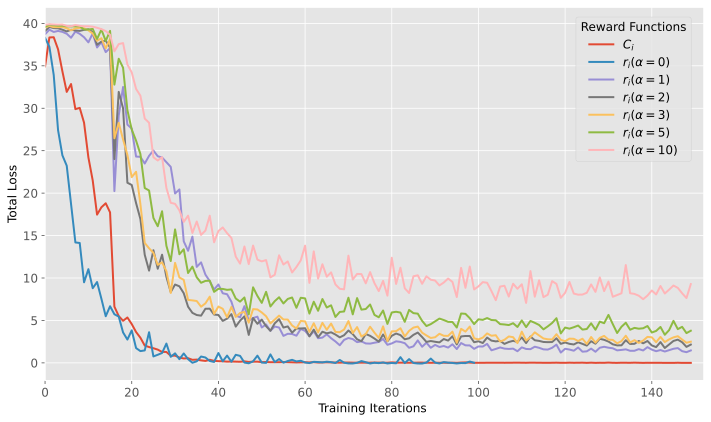

In [26]:
fig, axs = plt.subplots(figsize=figsize)

xlim = 250
line_width = 2

# Plot each series with distinct styles
axs.plot(concat_df, label='Capped', linewidth=line_width)

new_labels = [
    '$C_i$',
    r'$r_i(\alpha=0)$',
    r'$r_i(\alpha=1)$',
    r'$r_i(\alpha=2)$',
    r'$r_i(\alpha=3)$',
    r'$r_i(\alpha=5)$',
    r'$r_i(\alpha=10)$',
]

axs.legend(new_labels, fontsize='12', title='Reward Functions', title_fontsize='12', loc='upper right', bbox_to_anchor=(0.99, 0.99))
axs.set_xlabel(r'Training Iterations ', fontsize=12)
axs.set_ylabel('Total Loss', fontsize=12)
axs.grid(True, 'both')
axs.tick_params(axis='both', which='major', labelsize=12)
axs.set_xlim([0,152])

# Set the style of the plot
plt.style.use('ggplot')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 1])

# Save the plot to a file
plt.savefig(os.path.join(path_to_save_total_loss_data, 'total_loss_across_reward_fn.pdf'))

# Show the plot
plt.show()

## VF Loss

In [27]:
path_to_save_vf_data = "images_for_report_2x2/VF_loss"

In [28]:
def get_vf_loss_from_log_file_and_agent(log_file, agent_id):
    tag = "ray/tune/info/learner/"+str(agent_id)+"/vf_loss"
    col_name = log_file.split('/')[-3]

    vf_loss_series_dict = []

    for summary in summary_iterator(log_file):
        for value in summary.summary.value:
            if value.tag == tag:
                vf_loss_series_dict.append(value.simple_value)
    
    total_loss_series_dict_df = pd.DataFrame(vf_loss_series_dict, columns=[col_name])
    
    return total_loss_series_dict_df 

def get_vf_loss_from_log_file(log_file):
    labels = ["ray/tune/info/learner/1/vf_loss", 
              "ray/tune/info/learner/2/vf_loss", 
              "ray/tune/info/learner/5/vf_loss", 
              "ray/tune/info/learner/6/vf_loss"]

    vf_loss_series_dict = {f"vf_loss_{agent_id}" : [] for agent_id in [1, 2, 5, 6]}

    for summary in summary_iterator(log_file):
        for value in summary.summary.value:
            if value.tag in labels:
                tag = value.tag
                agent_id = tag.split('/')[-2]
                col_name = f"vf_loss_{agent_id}"
                vf_loss_series_dict[col_name].append(value.simple_value)

    vf_loss_series_dict_df = pd.DataFrame(vf_loss_series_dict)
    
    return vf_loss_series_dict_df 

In [29]:
vf_losses_agent_1 = pd.concat([get_vf_loss_from_log_file_and_agent(file, 1) for file in log_files_abs], axis=1)
vf_losses_agent_2 = pd.concat([get_vf_loss_from_log_file_and_agent(file, 2) for file in log_files_abs], axis=1)
vf_losses_agent_5 = pd.concat([get_vf_loss_from_log_file_and_agent(file, 5) for file in log_files_abs], axis=1)
vf_losses_agent_6 = pd.concat([get_vf_loss_from_log_file_and_agent(file, 6) for file in log_files_abs], axis=1)

In [30]:
vf_losses_agent_1.columns

Index(['PPO_2024-05-18_19_58__delta_wait_time_reward_capped', 'PPO_2024-05-16_09_54__alpha_0', 'PPO_2024-05-17_21_00__alpha_1', 'PPO_2024-05-18_17_19__alpha_2', 'PPO_2024-05-18_20_46__alpha_3', 'PPO_2024-05-18_23_01__alpha_5', 'PPO_2024-05-20_09_18__alpha_10'], dtype='object')

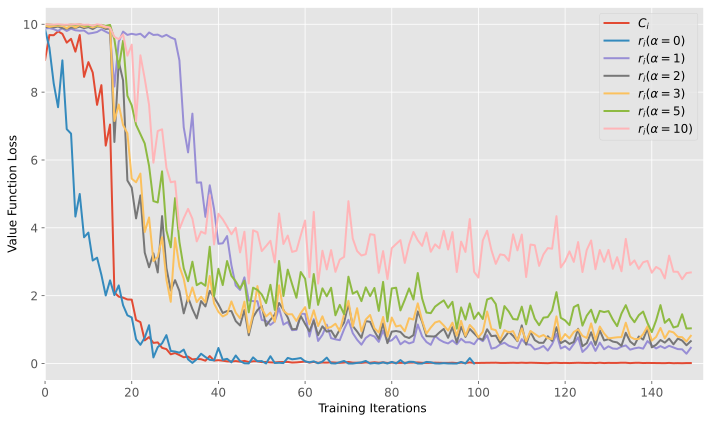

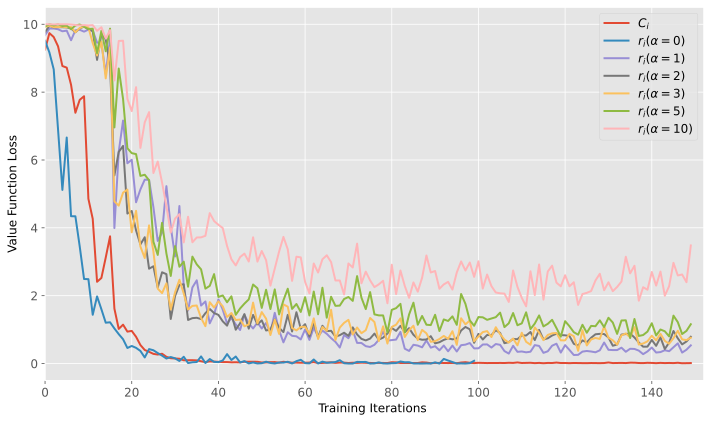

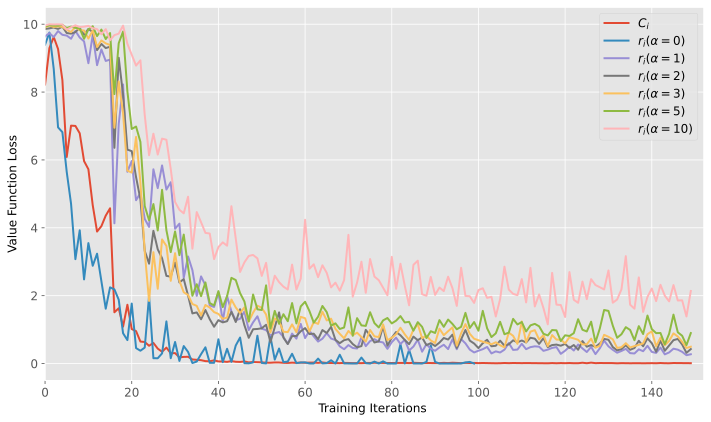

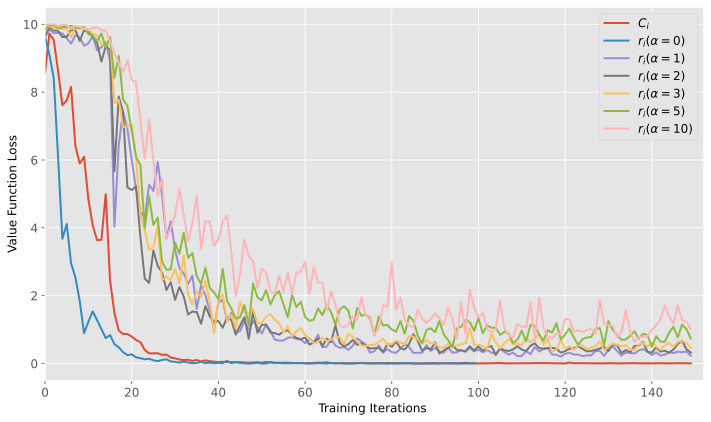

In [31]:
import matplotlib.pyplot as plt

os.makedirs(path_to_save_vf_data, exist_ok=True)
bbox_to_anchor=(1, 1)

xlim = 250
line_width = 2
new_labels = [
    '$C_i$',
    r'$r_i(\alpha=0)$',
    r'$r_i(\alpha=1)$',
    r'$r_i(\alpha=2)$',
    r'$r_i(\alpha=3)$',
    r'$r_i(\alpha=5)$',
    r'$r_i(\alpha=10)$',
]

# Create and save the first plot
plt.figure(figsize=figsize)
plt.plot(vf_losses_agent_1, label=new_labels, linewidth=line_width)
plt.legend(fontsize='12', loc='upper right', bbox_to_anchor=bbox_to_anchor)
plt.xlabel(r'Training Iterations ', fontsize=12)
plt.xlim([0,152])
plt.ylabel('Value Function Loss', fontsize=12)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.style.use('ggplot')
plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig(os.path.join(path_to_save_vf_data, '1.pdf'), dpi=10000)
plt.show()
plt.close()

# Create and save the second plot
plt.figure(figsize=figsize)
plt.plot(vf_losses_agent_2, label=new_labels, linewidth=line_width)
plt.legend(fontsize='12', loc='upper right', bbox_to_anchor=bbox_to_anchor)
plt.xlabel(r'Training Iterations ', fontsize=12)
plt.xlim([0,152])
plt.ylabel('Value Function Loss', fontsize=12)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.style.use('ggplot')
plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig(os.path.join(path_to_save_vf_data, '2.pdf'), dpi=10000)
plt.show()
plt.close()

# Create and save the third plot
plt.figure(figsize=figsize)
plt.plot(vf_losses_agent_5, label=new_labels, linewidth=line_width)
plt.legend(fontsize='12', loc='upper right', bbox_to_anchor=bbox_to_anchor)
plt.xlabel(r'Training Iterations ', fontsize=12)
plt.ylabel('Value Function Loss', fontsize=12)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.style.use('ggplot')
plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig(os.path.join(path_to_save_vf_data, '5.pdf'), dpi=10000)
plt.xlim([0,152])
plt.show()
plt.close()

# Create and save the fourth plot
plt.figure(figsize=figsize)
plt.plot(vf_losses_agent_6, label=new_labels, linewidth=line_width)
plt.legend(fontsize='12', loc='upper right', bbox_to_anchor=bbox_to_anchor)
plt.xlabel(r'Training Iterations ', fontsize=12)
plt.xlim([0,152])
plt.ylabel('Value Function Loss', fontsize=12)
plt.grid(True)
axs.set_xlim([0,152])
plt.tick_params(axis='both', which='major', labelsize=12)
plt.style.use('ggplot')
plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig(os.path.join(path_to_save_vf_data, '6.pdf'), dpi=10000)
plt.show()
plt.close()

In [32]:
vf_loss_tot = vf_losses_agent_1 + vf_losses_agent_2 + vf_losses_agent_5 + vf_losses_agent_6

<Figure size 1000x600 with 0 Axes>

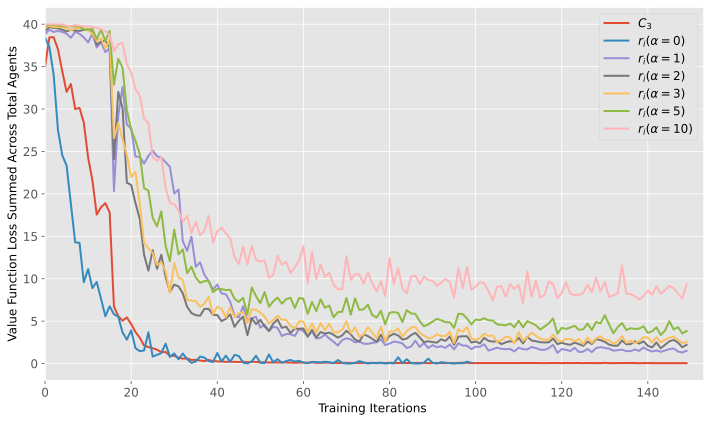

In [33]:
plt.figure(figsize=figsize)

xlim = 250
line_width = 2

# Plot each series with distinct styles
vf_loss_tot.plot(label='Capped', linewidth=line_width, figsize=figsize)
new_labels = [
    '$C_3$',
    r'$r_i(\alpha=0)$',
    r'$r_i(\alpha=1)$',
    r'$r_i(\alpha=2)$',
    r'$r_i(\alpha=3)$',
    r'$r_i(\alpha=5)$',
    r'$r_i(\alpha=10)$',
]

plt.legend(new_labels, fontsize='12', loc='upper right', bbox_to_anchor=(1, 1))
plt.xlabel(r'Training Iterations ', fontsize=12)
plt.xlim([0,153])
plt.ylabel('Value Function Loss Summed Across Total Agents', fontsize=12)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=12)

# Set the style of the plot
plt.style.use('ggplot')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 1])

# Save the plot to a file
plt.savefig(os.path.join(path_to_save_vf_data, "total_vf_loss_across_reward_fn.pdf"), dpi=10000)

# Show the plot
plt.show()
plt.close()

## Policy reward

In [34]:
path_to_save_mean_reward = os.path.join("images_for_report_2x2", "training_policy_reward")
os.makedirs(path_to_save_mean_reward, exist_ok=True)

In [35]:
def get_policy_reward_dict_mean_values(log_file):
    x = ["ray/tune/policy_reward_mean/1",
        "ray/tune/policy_reward_mean/2", 
        "ray/tune/policy_reward_mean/5",
        "ray/tune/policy_reward_mean/6"] 

    policy_reward_dict = {tag:0 for tag in x}

    policy_reward_series_dict = {tag:[] for tag in x}

    for summary in summary_iterator(os.path.abspath(log_file)):
        for value in summary.summary.value:
            if value.tag in x:
                policy_reward_dict[value.tag] = value.simple_value
                policy_reward_series_dict[value.tag].append(value.simple_value)
    
    return policy_reward_series_dict 

In [36]:
log_file_alpha_0 = "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/TRAINING/PPO_2024-05-16_09_54__alpha_0_from_2x2_diff_acc/PPO_2024-05-16_09_54__alpha_0/PPO_2x2grid_2024-05-16_09_54_eb8b3_00000_0_2024-05-16_09-54-35/events.out.tfevents.1715849689.MacBook-Pro-2"
log_file_alpha_0 = os.path.join("/Users/loveen/Desktop/Masters project/rl-multi-agent-traffic-nonexhaust-emissions-clean", log_file_alpha_0)

log_file_diff_wait = "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/TRAINING/PPO_2024-05-18_19_58__delta_wait_time_reward_capped/PPO_2024-05-18_19_58__delta_wait_time_reward_capped/PPO_2x2grid_with_wait_capped_2024-05-18_19_58_91c81_00000_0_2024-05-18_19-58-09/events.out.tfevents.1716058705.MacBook-Pro-2"
log_file_diff_wait = os.path.join("/Users/loveen/Desktop/Masters project/rl-multi-agent-traffic-nonexhaust-emissions-clean", log_file_diff_wait)

log_file_alpha_1 = "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/TRAINING/PPO_2024-05-17_21_00__alpha_1/PPO_2024-05-17_21_00__alpha_1/PPO_2x2grid_with_wait_capped_2024-05-17_21_00_2f485_00000_0_2024-05-17_21-01-01/events.out.tfevents.1715976076.MacBook-Pro-2"
log_file_alpha_1 = os.path.join("/Users/loveen/Desktop/Masters project/rl-multi-agent-traffic-nonexhaust-emissions-clean", log_file_alpha_1)

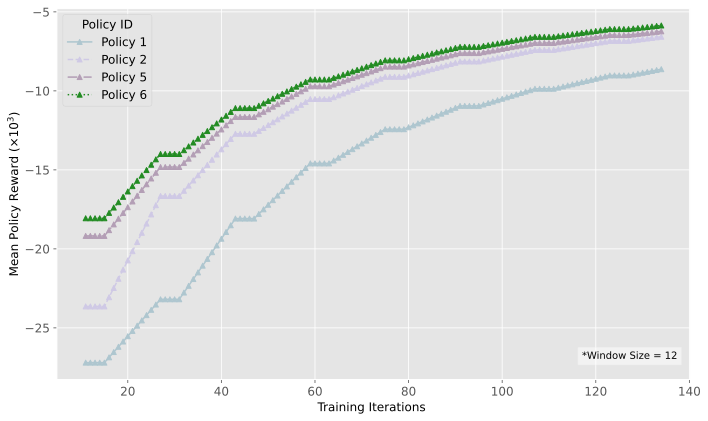

In [36]:
# Set plot style and figure size
plt.style.use('ggplot')  # Use a different style for better aesthetics

# Inline backend for SVG format in Jupyter Notebooks (if applicable)
%config InlineBackend.figure_format = 'svg'

# Define the window size for rolling mean
window_size = 12

markersize = 5
# Load policy reward data
policy_reward_series_dict_alpha_1 = pd.DataFrame(get_policy_reward_dict_mean_values(log_file_alpha_1))

# Create a larger figure to improve readability
fig, ax = plt.subplots(figsize=figsize)  # Adjust figure size as needed

# Define a pastel color palette
colors = ['#AEC6CF', '#CFC9E5', '#B39EB5', '#228B22']
markers = ['^', '^', '^', '^']

# markers = ['o', 'v', 's', '^']
           
# Plot each policy's mean reward with distinct styles
ax.plot((policy_reward_series_dict_alpha_1["ray/tune/policy_reward_mean/1"]/100).rolling(window=window_size).mean(), 
        label='Policy 1', linewidth=1.5, linestyle='-', marker=markers[0], color=colors[0], markersize=markersize)
ax.plot((policy_reward_series_dict_alpha_1["ray/tune/policy_reward_mean/2"]/100).rolling(window=window_size).mean(), 
        label='Policy 2', linewidth=1.5, linestyle='--', marker=markers[1], color=colors[1], markersize=markersize)
ax.plot((policy_reward_series_dict_alpha_1["ray/tune/policy_reward_mean/5"]/100).rolling(window=window_size).mean(), 
        label='Policy 5', linewidth=1.5, linestyle='-.', marker=markers[2], color=colors[2], markersize=markersize)
ax.plot((policy_reward_series_dict_alpha_1["ray/tune/policy_reward_mean/6"]/100).rolling(window=window_size).mean(), 
        label='Policy 6', linewidth=1.5, linestyle=':', marker=markers[3], color=colors[3], markersize=markersize)

# Improve the aesthetics
ax.set_xlabel(r'Training Iterations ', fontsize=12)
ax.set_ylabel(r'Mean Policy Reward ($\times 10^3$)', fontsize=12)
ax.legend(title='Policy ID', title_fontsize='12', fontsize='12', loc='best')
ax.grid(True)

# Adjust tick params and rotate y-axis labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 1])  # Adjust layout to fit everything nicely

# Add text annotation for window size
plt.text(0.98, 0.05, f'*Window Size = {window_size}', 
         horizontalalignment='right', 
         verticalalignment='bottom', 
         transform=plt.gca().transAxes, 
         fontsize=10, 
         bbox=dict(facecolor='white', alpha=0.5))

# Save the plot to a file
plt.savefig(os.path.join(path_to_save_mean_reward, "averaged_over_all_agents_for_alpha_1.pdf"))

# Show the plot
plt.show()

## Columns of interest to place in report:

In [37]:
df_subset = df_average_whole_experiment_ordered[['sys_abs_accel_episode_sum', 
                             'sys_avg_waiting_time_episode_mean',
                             "sys_total_stopped_episode_mean",
                             "sys_avg_speed_episode_mean",
                             "tot_agent_stopped_episode_mean",
                             "tot_agent_stopped_episode_sum",
                             "tot_agent_accum_wait_time",
                             "all_agents_abs_accel_episode_mean"]]

df_subset = df_average_whole_experiment_ordered[["sys_total_stopped_episode_mean"]]
df_subset


,sys_total_stopped_episode_mean
alpha_0,74.35190
alpha_1,1.49344
alpha_1_1,1.47072
alpha_1_5,1.39614
alpha_2,1.41528
alpha_3,1.32296
alpha_5,1.28724
alpha_10,1.27134
trained_delta_wait_time,1.20268
fixed_tc,11.04608


In [38]:
print(df_subset.to_latex())

\begin{tabular}{lr}
\toprule
 & sys_total_stopped_episode_mean \\
\midrule
alpha_0 & 74.351900 \\
alpha_1 & 1.493440 \\
alpha_1_1 & 1.470720 \\
alpha_1_5 & 1.396140 \\
alpha_2 & 1.415280 \\
alpha_3 & 1.322960 \\
alpha_5 & 1.287240 \\
alpha_10 & 1.271340 \\
trained_delta_wait_time & 1.202680 \\
fixed_tc & 11.046080 \\
\bottomrule
\end{tabular}



## Inspecting Reward Fn before and after Capping

In [39]:
path_to_save_reward_fn_trajec = "images_for_report_2x2/reward_fn"
os.makedirs(path_to_save_reward_fn_trajec, exist_ok=True)

In [40]:
import os
import sys 
sys.path.append("../")
from data_analysis_functions import generate_summary_df_from_csv, get_df_from_csv
import matplotlib.pyplot as plt

figsize=figsize

In [41]:
diff_accum_wait_path = "reward_measuring_experiment/2x2grid/combined_reward_function_factory_with_diff_accum_wait_time"
diff_accum_wait_normalised = "reward_measuring_experiment/2x2grid/combined_reward_function_factory_with_diff_accum_wait_time_normalised_for_resco_train"
diff_accum_wait_capped_path = "reward_measuring_experiment/2x2grid/combined_reward_function_factory_with_diff_accum_wait_time_capped"

paths = [diff_accum_wait_path, diff_accum_wait_normalised, diff_accum_wait_capped_path]

In [42]:
abs_paths = [os.path.join("/Users/loveen/Desktop/Masters project/rl-multi-agent-traffic-nonexhaust-emissions-clean/", x) for x in paths]

In [43]:
import pandas as pd
seeds_to_group_join = [39, 83]
diff_accum_wait_reward_df = pd.concat([get_df_from_csv(abs_paths[0], eval_dir="fixed_tc", csv_file_name="extra_metrics.csv", seed=seed)
                     for seed in seeds_to_group_join ], axis=1)

diff_accum_wait_normalised_reward_df = pd.concat([get_df_from_csv(abs_paths[1], eval_dir="fixed_tc", csv_file_name="extra_metrics.csv", seed=seed)
                     for seed in seeds_to_group_join ], axis=1)

diff_accum_wait_capped_reward_df = pd.concat([get_df_from_csv(abs_paths[2], eval_dir="fixed_tc", csv_file_name="extra_metrics.csv", seed=seed)
                     for seed in seeds_to_group_join ], axis=1)

In [44]:
diff_accum_wait_reward_grouped = diff_accum_wait_reward_df.groupby(
                                                by=diff_accum_wait_reward_df.columns, 
                                                axis=1).mean()
diff_accum_wait_normalised_reward_grouped = diff_accum_wait_normalised_reward_df.groupby(
                                                by=diff_accum_wait_normalised_reward_df.columns, 
                                                axis=1).mean()
diff_accum_wait_capped_reward_grouped = diff_accum_wait_capped_reward_df.groupby(
                                                by=diff_accum_wait_capped_reward_df.columns, 
                                                axis=1).mean()

/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_7915/2831884833.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  diff_accum_wait_reward_grouped = diff_accum_wait_reward_df.groupby(
/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_7915/2831884833.py:4: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  diff_accum_wait_normalised_reward_grouped = diff_accum_wait_normalised_reward_df.groupby(
/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_7915/2831884833.py:7: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  diff_accum_wait_capped_reward_grouped = diff_accum_wait_capped_reward_df.groupby(


In [45]:
diff_accum_wait_reward_grouped.describe()

,env_step_num,reward_1,reward_2,reward_5,reward_6,total_agent_reward
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,-0.179062,-0.156904,-0.144470,-0.112143,-0.592580
std,288.819436,0.270418,0.273072,0.275677,0.244186,0.843842
min,0.000000,-0.736396,-0.892107,-0.868261,-0.643540,-1.955452
25%,249.750000,-0.360691,-0.356283,-0.343791,-0.246968,-1.097837
50%,499.500000,-0.243281,-0.175819,-0.172859,-0.175004,-0.860143
75%,749.250000,-0.059622,-0.036512,-0.036907,-0.088412,-0.432520
max,999.000000,0.648036,0.796143,0.873092,0.945816,2.666159


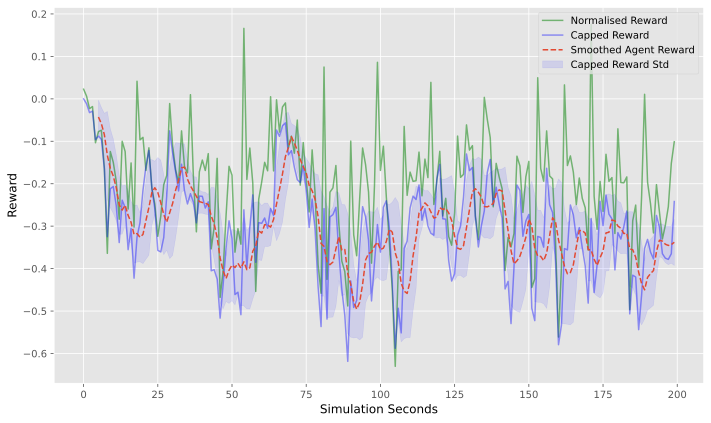

In [46]:
fig, axis = plt.subplots(figsize=(figsize))
xstart=0
xperiod=200
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'

# axis[0,0].plot(diff_accum_wait_reward_grouped['reward_1'][xstart:xstart+xperiod], label='reward')
axis.plot(diff_accum_wait_normalised_reward_grouped['reward_1'][xstart:xstart+xperiod]-0.8, label='Normalised Reward', color = 'green', alpha=0.5) # we shift this down for visibility during comparison
axis.plot(diff_accum_wait_capped_reward_grouped['reward_1'][xstart:xstart+xperiod], label='Capped Reward', color='blue', alpha=0.4)

window_size = 6  # You can adjust the window size based on your data
# axis[0,0].plot(diff_accum_wait_capped_reward_grouped['reward_1'][xstart:xstart+xperiod].rolling(window=window_size).mean(), label='Smoothed Capped Reward', linestyle='--')

axis.plot(diff_accum_wait_capped_reward_grouped['reward_1'][xstart:xstart+xperiod].rolling(window=window_size).mean(), label='Smoothed Agent Reward', linestyle='--')
axis.set_xlabel("Simulation Seconds", fontsize=12)
axis.set_ylabel("Reward", fontsize=12)

mean_line = diff_accum_wait_capped_reward_grouped['reward_1'][xstart:xstart+xperiod].rolling(window=window_size).mean()
std_dev = diff_accum_wait_capped_reward_grouped['reward_1'][xstart:xstart+xperiod].rolling(window=window_size).std()
axis.fill_between(range(xstart, xstart+xperiod), mean_line-std_dev, mean_line+std_dev, color='b', alpha=0.1, label='Capped Reward Std')

axis.legend(loc='upper right')

fig.tight_layout(rect=[0, 0, 1, 1])

fig.savefig(os.path.join(path_to_save_reward_fn_trajec, "reward_over_200s_plot_policy_1.pdf"))

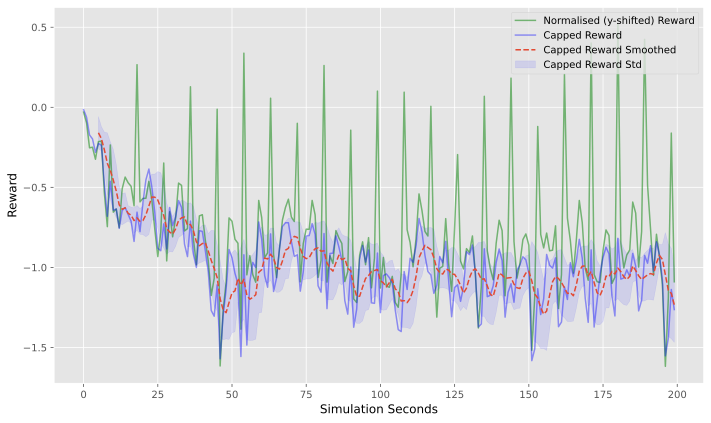

In [47]:
fig, axis = plt.subplots(figsize=figsize)
xstart=0
xperiod=200
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'

# axis[0,0].plot(diff_accum_wait_reward_grouped['reward_1'][xstart:xstart+xperiod], label='reward')
axis.plot(diff_accum_wait_normalised_reward_grouped['total_agent_reward'][xstart:xstart+xperiod]-3.3, label='Normalised (y-shifted) Reward', color = 'green', alpha=0.5) # we shift this down for visibility during comparison

axis.plot(diff_accum_wait_capped_reward_grouped['total_agent_reward'][xstart:xstart+xperiod], label='Capped Reward', color='blue', alpha=0.4)
axis.plot(diff_accum_wait_capped_reward_grouped['total_agent_reward'][xstart:xstart+xperiod].rolling(window=window_size).mean(), label='Capped Reward Smoothed', linestyle='--')

axis.set_xlabel("Simulation Seconds", fontsize=12)
axis.set_ylabel("Reward", fontsize=12)

fig.tight_layout(rect=[0, 0, 1, 1])

window_size = 6  # You can adjust the window size based on your data
# axis[0,0].plot(diff_accum_wait_capped_reward_grouped['reward_1'][xstart:xstart+xperiod].rolling(window=window_size).mean(), label='Smoothed Capped Reward', linestyle='--')

mean_line = diff_accum_wait_capped_reward_grouped['total_agent_reward'][xstart:xstart+xperiod].rolling(window=window_size).mean()
std_dev = diff_accum_wait_capped_reward_grouped['total_agent_reward'][xstart:xstart+xperiod].rolling(window=window_size).std()
axis.fill_between(range(xstart, xstart+xperiod), mean_line-std_dev, mean_line+std_dev, color='b', alpha=0.1, label='Capped Reward Std')

# plt.title("Total Agent Reward trajectory")
plt.legend(loc='upper right')
plt.show()

fig.savefig(os.path.join(path_to_save_reward_fn_trajec, "reward_over_200s_plot_averaged_all_policies.pdf"))

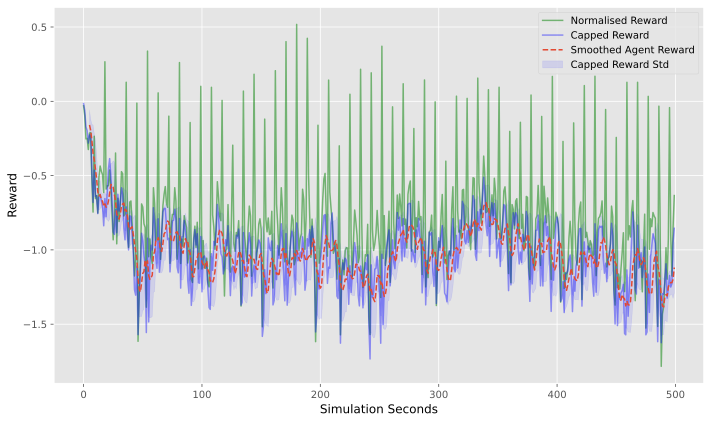

In [48]:
plt.figure(figsize=figsize)
xstart=0
xperiod=500
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'

# axis[0,0].plot(diff_accum_wait_reward_grouped['reward_1'][xstart:xstart+xperiod], label='reward')
plt.plot(diff_accum_wait_normalised_reward_grouped['total_agent_reward'][xstart:xstart+xperiod]-3.3, label='Normalised Reward', color = 'green', alpha=0.5) # we shift this down for visibility during comparison

plt.plot(diff_accum_wait_capped_reward_grouped['total_agent_reward'][xstart:xstart+xperiod], label='Capped Reward', color='blue', alpha=0.4)
plt.plot(diff_accum_wait_capped_reward_grouped['total_agent_reward'][xstart:xstart+xperiod].rolling(window=window_size).mean(), label='Smoothed Agent Reward', linestyle='--')
plt.xlabel("Simulation Seconds", fontsize=12)
plt.ylabel("Reward", fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 1])

window_size = 6  # You can adjust the window size based on your data
# axis[0,0].plot(diff_accum_wait_capped_reward_grouped['reward_1'][xstart:xstart+xperiod].rolling(window=window_size).mean(), label='Smoothed Capped Reward', linestyle='--')

mean_line = diff_accum_wait_capped_reward_grouped['total_agent_reward'][xstart:xstart+xperiod].rolling(window=window_size).mean()
std_dev = diff_accum_wait_capped_reward_grouped['total_agent_reward'][xstart:xstart+xperiod].rolling(window=window_size).std()
plt.fill_between(range(xstart, xstart+xperiod), mean_line-std_dev, mean_line+std_dev, color='b', alpha=0.1, label='Capped Reward Std')

plt.legend(loc='upper right')

plt.savefig(os.path.join(path_to_save_reward_fn_trajec, "reward_over_500s_plot_averaged_all_policies.pdf"))

plt.show()

In [49]:
diff_accum_wait_reward_grouped.diff().std()

env_step_num          0.000000
reward_1              0.307161
reward_2              0.304526
reward_5              0.300941
reward_6              0.317935
total_agent_reward    1.102964
dtype: float64

In [50]:
import pandas as pd

diff_accum_wait_reward_grouped_tot_agent = diff_accum_wait_reward_grouped['total_agent_reward']
diff_accum_wait_normalised_reward_grouped_tot_agent = diff_accum_wait_normalised_reward_grouped['total_agent_reward']
diff_accum_wait_capped_reward_grouped_tot_agent = diff_accum_wait_capped_reward_grouped['total_agent_reward']

convergence_summary_table = pd.DataFrame(index=['Original', 'Reward Normalised', 'Reward Capped'], columns=[ "Moving Average Convergence", "Std of Difference"])

convergence_summary_table.loc['Original',  "Moving Average Convergence"] = np.mean(
    np.abs(diff_accum_wait_reward_grouped_tot_agent - diff_accum_wait_reward_grouped_tot_agent.rolling(window=10).mean()))
convergence_summary_table.loc['Reward Normalised', "Moving Average Convergence"] = np.mean(
    np.abs(diff_accum_wait_normalised_reward_grouped_tot_agent - diff_accum_wait_normalised_reward_grouped_tot_agent.rolling(window=10).mean()))
convergence_summary_table.loc['Reward Capped', "Moving Average Convergence"] = np.mean(
    np.abs(diff_accum_wait_capped_reward_grouped_tot_agent - diff_accum_wait_capped_reward_grouped_tot_agent.rolling(window=10).mean()))
convergence_summary_table

convergence_summary_table.loc['Original', "Std of Difference"] = np.diff(diff_accum_wait_reward_grouped_tot_agent).std()
convergence_summary_table.loc['Reward Normalised', "Std of Difference"] = np.diff(diff_accum_wait_normalised_reward_grouped_tot_agent).std()
convergence_summary_table.loc['Reward Capped', "Std of Difference"] = np.diff(diff_accum_wait_capped_reward_grouped_tot_agent).std()

convergence_summary_table.loc['Original', "Variance"] = np.sum(np.abs(diff_accum_wait_reward_grouped_tot_agent.diff()))
convergence_summary_table.loc['Reward Normalised', "Variance"] = np.sum(np.abs(diff_accum_wait_normalised_reward_grouped_tot_agent.diff()))
convergence_summary_table.loc['Reward Capped', "Variance"] = np.sum(np.abs(diff_accum_wait_capped_reward_grouped_tot_agent.diff()))

convergence_summary_table

,Moving Average Convergence,Std of Difference,Variance
Original,0.554675,1.102412,643.718370
Reward Normalised,0.243909,0.540007,368.870533
Reward Capped,0.14881,0.214294,170.221922


In [51]:
convergence_summary_table_of_interest = convergence_summary_table.iloc[1:,:]
convergence_summary_table_of_interest

,Moving Average Convergence,Std of Difference,Variance
Reward Normalised,0.243909,0.540007,368.870533
Reward Capped,0.14881,0.214294,170.221922


In [52]:
print(convergence_summary_table_of_interest.to_latex())

\begin{tabular}{lllr}
\toprule
 & Moving Average Convergence & Std of Difference & Variance \\
\midrule
Reward Normalised & 0.243909 & 0.540007 & 368.870533 \\
Reward Capped & 0.148810 & 0.214294 & 170.221922 \\
\bottomrule
\end{tabular}



In [53]:
368.870533/170.221922

2.1669978147702973

In [54]:
(368.870533 - 170.221922) / 368.870533

0.5385320681063999

## Explained Variance for Capped VS Uncapped

In [55]:
path_to_save = "images_for_report_2x2/explained_variance_before_after_capping"  # Define your path to save the figures

os.makedirs(path_to_save, exist_ok=True)
# Create individual plots for each policy

In [56]:
# get reward functions values for all training: 
from tensorflow.python.summary.summary_iterator import summary_iterator
import tensorflow as tf

In [57]:
uncapped_training_results_tf_file = "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/TRAINING/PPO_2024-05-22_15_16__alpha_1_normalised_uncapped/PPO_2024-05-22_15_16__alpha_1_normalised_uncapped/PPO_2x2grid_with_wait_capped_2024-05-22_15_16_e2348_00000_0_2024-05-22_15-16-29/events.out.tfevents.1716387405.MacBook-Pro-2"
uncapped_training_results_tf_file = os.path.join("/Users/loveen/Desktop/Masters project/rl-multi-agent-traffic-nonexhaust-emissions-clean", uncapped_training_results_tf_file)

capped_training_results_tf_file = "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/TRAINING/PPO_2024-05-17_21_00__alpha_1/PPO_2024-05-17_21_00__alpha_1/PPO_2x2grid_with_wait_capped_2024-05-17_21_00_2f485_00000_0_2024-05-17_21-01-01/events.out.tfevents.1715976076.MacBook-Pro-2"
capped_training_results_tf_file = os.path.join("/Users/loveen/Desktop/Masters project/rl-multi-agent-traffic-nonexhaust-emissions-clean", capped_training_results_tf_file)


In [58]:
def get_explained_var_dict_from_log_file(log_file):
    agent_specific_labels = [
        "ray/tune/info/learner/1/vf_explained_var",
        "ray/tune/info/learner/2/vf_explained_var",
        "ray/tune/info/learner/5/vf_explained_var",
        "ray/tune/info/learner/6/vf_explained_var"]

    explained_variance_dict = {tag:[] for tag in agent_specific_labels}

    for summary in summary_iterator(os.path.abspath(log_file)):
        for value in summary.summary.value:
            if value.tag in agent_specific_labels:
                explained_variance_dict[value.tag].append(value.simple_value)
    return pd.DataFrame(explained_variance_dict)

In [59]:
explained_variance_dict_capped = get_explained_var_dict_from_log_file(capped_training_results_tf_file)
explained_variance_dict_uncapped = get_explained_var_dict_from_log_file(uncapped_training_results_tf_file)

In [60]:
capped_tot_agent_sum_variance = explained_variance_dict_capped.mean(axis=1)
uncapped_tot_agent_sum_variance = explained_variance_dict_uncapped.mean(axis=1)

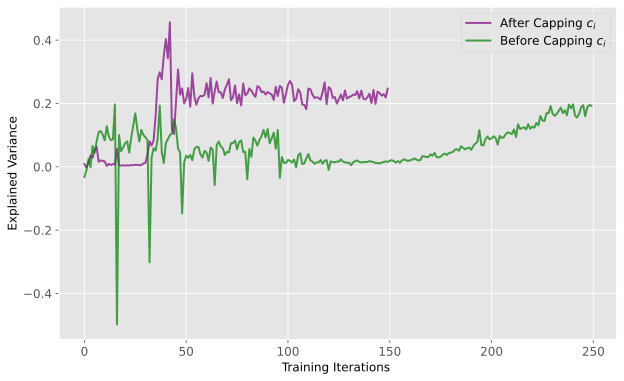

<Figure size 640x480 with 0 Axes>

In [61]:
plt.figure(figsize=figsize)

xlim = 250
line_width = 2

# Plot each series with distinct styles
plt.plot(capped_tot_agent_sum_variance, label='After Capping ' + r'$c_i$', linewidth=line_width, color='purple', alpha=0.7)
plt.plot(uncapped_tot_agent_sum_variance, label='Before Capping ' + r'$c_i$', linewidth=line_width, color='green', alpha=0.7)

plt.legend(fontsize='12', loc='best')
plt.xlabel(r'Training Iterations ', fontsize=12)
plt.ylabel('Explained Variance', fontsize=12)
plt.grid(True, 'both')
plt.tick_params(axis='both', which='major', labelsize=12)
# plt.title("Explained Variance Summed across all agents")

plt.show()

plt.savefig(os.path.join(path_to_save, "Explained_Variance_Averaged_Over_All_Agents.pdf"))

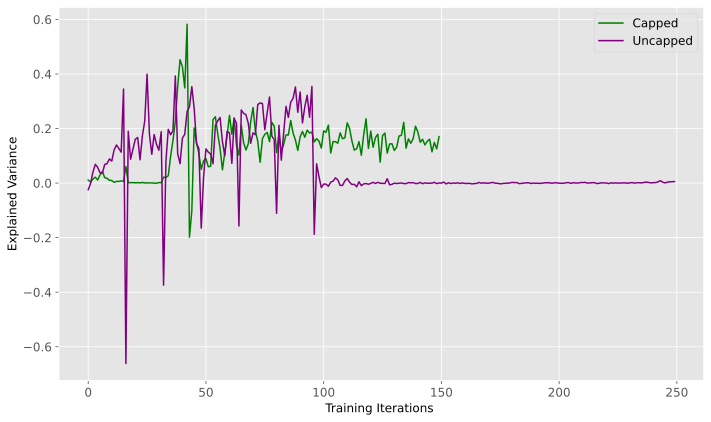

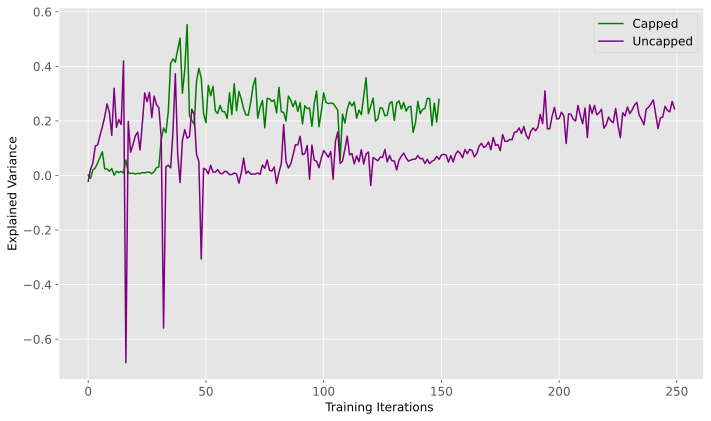

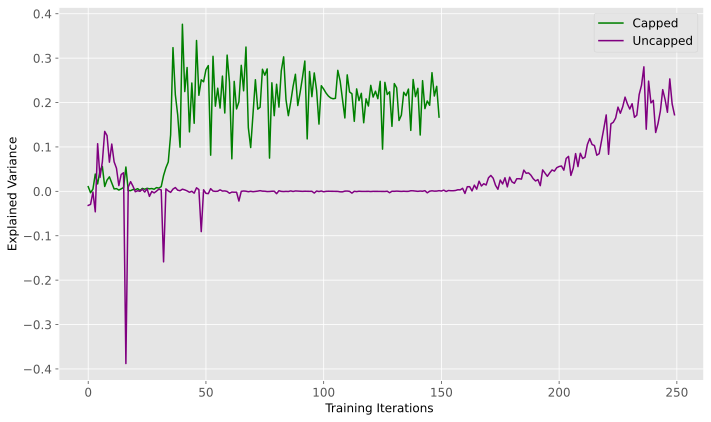

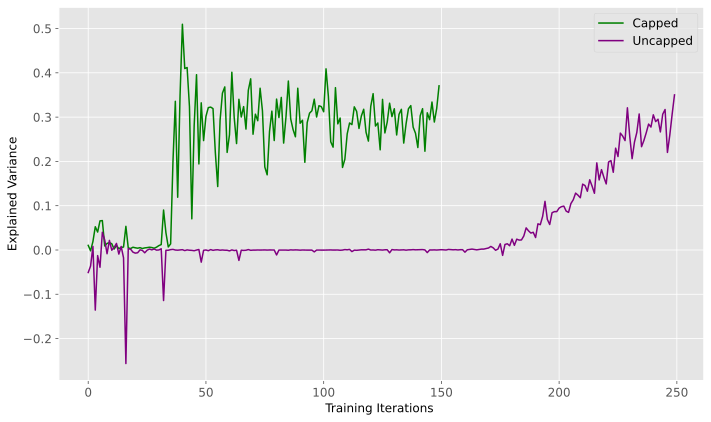

In [62]:
import matplotlib.pyplot as plt
import os

# Assuming explained_variance_dict_capped and explained_variance_dict_uncapped are defined
# and are pandas DataFrames with the necessary data

# Define common parameters
xlim = 250
line_width = 1.5

def create_plot(data_capped, data_uncapped, col_num, policy_number, path_to_save):
    plt.figure(figsize=figsize)
    plt.style.use('ggplot')
    
    plt.plot(data_capped.iloc[:, col_num], label='Capped', linewidth=line_width, color='green')
    plt.plot(data_uncapped.iloc[:xlim, col_num], label='Uncapped', linewidth=line_width, color='purple')
    
    plt.legend(fontsize='12', loc='best')
    plt.xlabel(r'Training Iterations ', fontsize=12)
    plt.ylabel('Explained Variance', fontsize=12)
    plt.grid(True)
    plt.tick_params(axis='both', which='major', labelsize=12)

    plt.tight_layout(rect=[0, 0, 1, 1])

    # plt.title(f'Comparison of Explained Variance: Capped vs. Uncapped Policy {policy_number}', fontsize=16, fontweight='bold')

    plt.savefig(os.path.join(path_to_save, f'{policy_number}.pdf'))
    plt.show()

# Create plots for each policy
create_plot(explained_variance_dict_capped, explained_variance_dict_uncapped, 0, 1, path_to_save)
create_plot(explained_variance_dict_capped, explained_variance_dict_uncapped, 1, 2, path_to_save)
create_plot(explained_variance_dict_capped, explained_variance_dict_uncapped, 2, 5, path_to_save)
create_plot(explained_variance_dict_capped, explained_variance_dict_uncapped, 3, 6, path_to_save)

## Total Loss Curve for Capped Reward and Uncapped Reward

In [63]:
def get_total_loss_from_tf_file(tf_file_path):
    total_loss = []
    for summary in summary_iterator(tf_file_path):
        for value in summary.summary.value:
            if value.tag == "ray/tune/info/learner/__all__/total_loss":
                total_loss.append(value.simple_value)
    
    total_loss_df = pd.DataFrame(total_loss)
    
    return total_loss_df

In [64]:
uncapped_total_loss = get_total_loss_from_tf_file(uncapped_training_results_tf_file)
capped_total_loss_df = get_total_loss_from_tf_file(capped_training_results_tf_file)

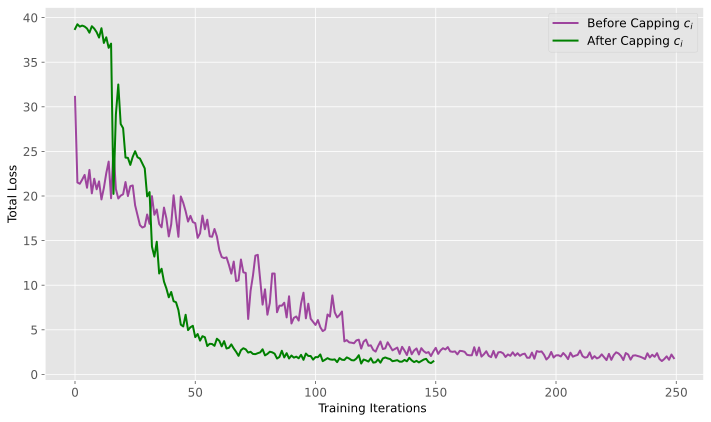

<Figure size 640x480 with 0 Axes>

In [65]:
plt.figure(figsize=figsize)

xlim = 250
line_width = 2
r'$f_2(\alpha=10)$'
r'$c_i$',
# Plot each series with distinct styles
plt.plot(uncapped_total_loss, label='Before Capping ' + r'$c_i$', linewidth=line_width, color='purple', alpha=0.7)
plt.plot(capped_total_loss_df, label='After Capping '+ r'$c_i$', linewidth=line_width, color='green')

# plt.title('Total Loss for all Agents during Training', fontsize=12, fontweight='bold')
plt.legend(fontsize='12', loc='best')
plt.xlabel(r'Training Iterations ', fontsize=12)
plt.ylabel('Total Loss', fontsize=12)
plt.grid(True, 'both')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout(rect=[0, 0, 1, 1])

plt.show()

plt.savefig(os.path.join(path_to_save, "total_loss_before_after_capping.pdf"))

# Loss Curves of all 4 loss curves

## Before And After Capping

In [66]:
ids = ["1", "2", "5", "6"]

In [67]:
def get_vf_loss_from_log_file_and_agent(log_file, agent_id):
    tag = "ray/tune/info/learner/"+str(agent_id)+"/total_loss"
    col_name = log_file.split('/')[-3]

    vf_loss_series_dict = []

    for summary in summary_iterator(log_file):
        for value in summary.summary.value:
            if value.tag == tag:
                vf_loss_series_dict.append(value.simple_value)
    
    total_loss_series_dict_df = pd.DataFrame(vf_loss_series_dict, columns=[col_name])
    
    return total_loss_series_dict_df 

def get_loss_from_log_file(log_file):
    labels = [f"ray/tune/info/learner/{id}/total_loss" for id in ids]

    loss_series_dict = {f"total_loss_{agent_id}" : [] for agent_id in ids}

    for summary in summary_iterator(log_file):
        for value in summary.summary.value:
            if value.tag in labels:
                tag = value.tag
                agent_id = tag.split('/')[-2]
                col_name = f"total_loss_{agent_id}"
                loss_series_dict[col_name].append(value.simple_value)

    loss_series_dict_df = pd.DataFrame(loss_series_dict)
    
    return loss_series_dict_df 

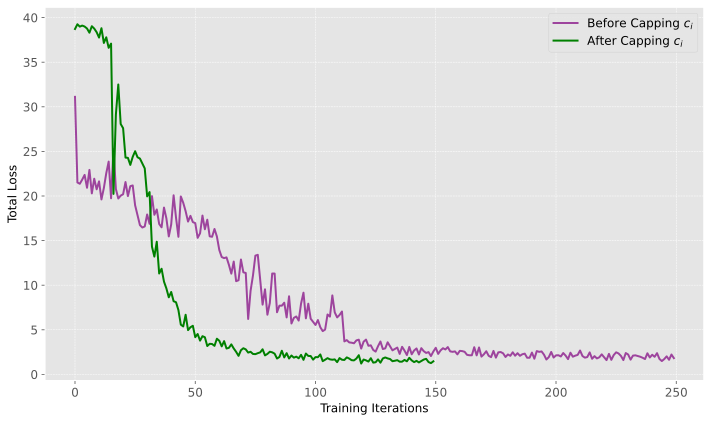

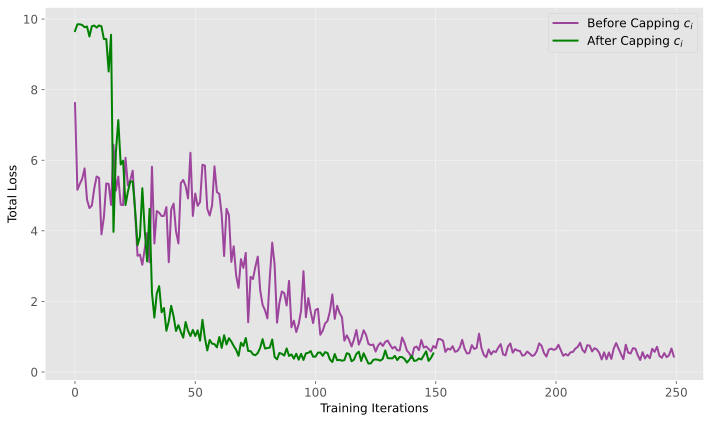

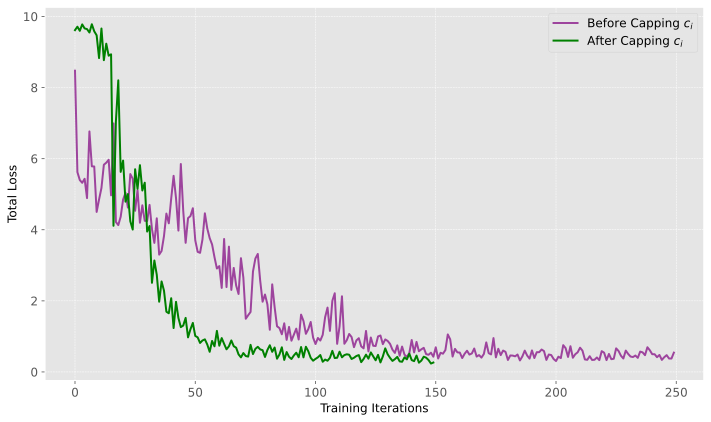

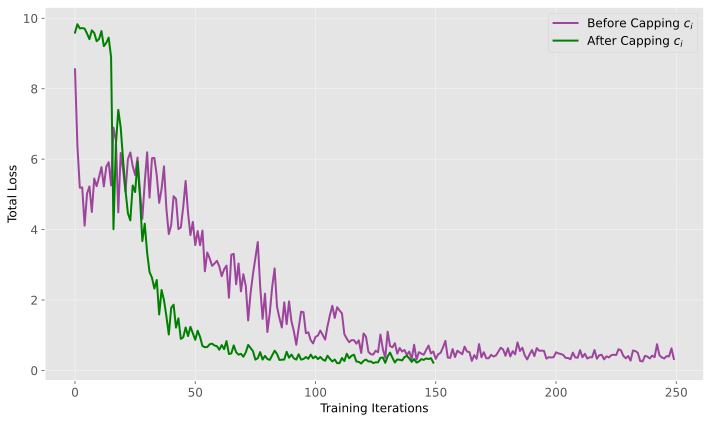

In [68]:
import matplotlib.pyplot as plt

# Assuming total_loss_series_dict_df_ctce and total_loss_series_dict_df_dtde are provided as lists or arrays


line_width = 2

for id in ids:

    fig, axs = plt.subplots(figsize=figsize)

    uncapped_agent_losses = get_vf_loss_from_log_file_and_agent(uncapped_training_results_tf_file, id)
    capped_agent_losses = get_vf_loss_from_log_file_and_agent(capped_training_results_tf_file, id)

    # Plot each series with distinct styles
    axs.plot(uncapped_agent_losses, label='Before Capping ' + r'$c_i$', color='purple', linestyle='-', linewidth=line_width, alpha=0.7)
    axs.plot(capped_agent_losses, label='After Capping ' + r'$c_i$', color='green', linestyle='-', linewidth=line_width)

    # axs.plot(total_loss_series_dict_df_dtde, label='DTDE', color='grey', linestyle='-', linewidth=line_width)

    # Add a legend
    axs.legend(fontsize='12', title_fontsize='12', loc='upper right')
    axs.legend(fontsize='12',loc='upper right')

    # Set labels and title
    axs.set_xlabel(r'Training Iterations', fontsize=12)
    axs.set_ylabel('Total Loss', fontsize=12)
    # axs.set_title('To/tal Loss over Training Iterations', fontsize=14)

    # Customize grid
    axs.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Customize ticks
    axs.tick_params(axis='both', which='major', labelsize=12)
    # axs.set_ylim([0, 3.5])
    # axs.set_xlim([0, 1000])

    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0, 1, 1])

    # Save the plot to a file
    plt.savefig(os.path.join(path_to_save_total_loss_data, f'{id}.pdf'))

    # Show the plot
    plt.show()

    plt.close()

## Loss curve for all alpha values

In [69]:
def get_loss_from_log_file_and_agent(log_file, agent_id):
    tag = "ray/tune/info/learner/"+str(agent_id)+"/total_loss"
    col_name = log_file.split('/')[-3]

    vf_loss_series_dict = []

    for summary in summary_iterator(log_file):
        for value in summary.summary.value:
            if value.tag == tag:
                vf_loss_series_dict.append(value.simple_value)
    
    total_loss_series_dict_df = pd.DataFrame(vf_loss_series_dict, columns=[col_name])
    
    return total_loss_series_dict_df 

def get_loss_from_log_file(log_file):
    labels = ["ray/tune/info/learner/1/total_loss", 
              "ray/tune/info/learner/2/total_loss", 
              "ray/tune/info/learner/5/total_loss", 
              "ray/tune/info/learner/6/total_loss"]

    vf_loss_series_dict = {f"vf_loss_{agent_id}" : [] for agent_id in [1, 2, 5, 6]}

    for summary in summary_iterator(log_file):
        for value in summary.summary.value:
            if value.tag in labels:
                tag = value.tag
                agent_id = tag.split('/')[-2]
                col_name = f"vf_loss_{agent_id}"
                vf_loss_series_dict[col_name].append(value.simple_value)

    vf_loss_series_dict_df = pd.DataFrame(vf_loss_series_dict)
    
    return vf_loss_series_dict_df 

In [70]:
losses_agent_1 = pd.concat([get_loss_from_log_file_and_agent(file, 1) for file in log_files_abs], axis=1)
losses_agent_2 = pd.concat([get_loss_from_log_file_and_agent(file, 2) for file in log_files_abs], axis=1)
losses_agent_5 = pd.concat([get_loss_from_log_file_and_agent(file, 5) for file in log_files_abs], axis=1)
losses_agent_6 = pd.concat([get_loss_from_log_file_and_agent(file, 6) for file in log_files_abs], axis=1)

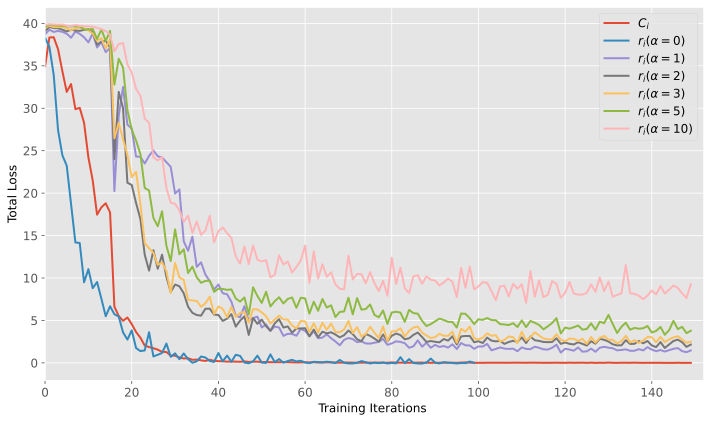

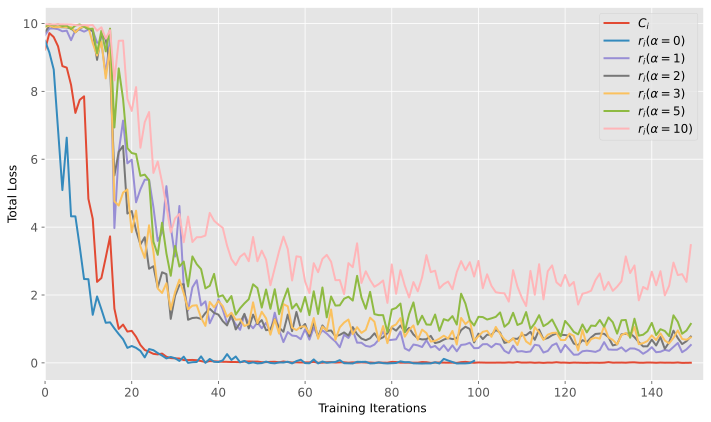

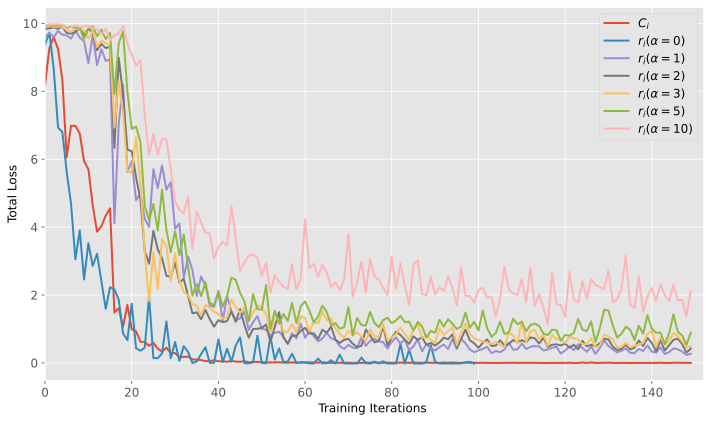

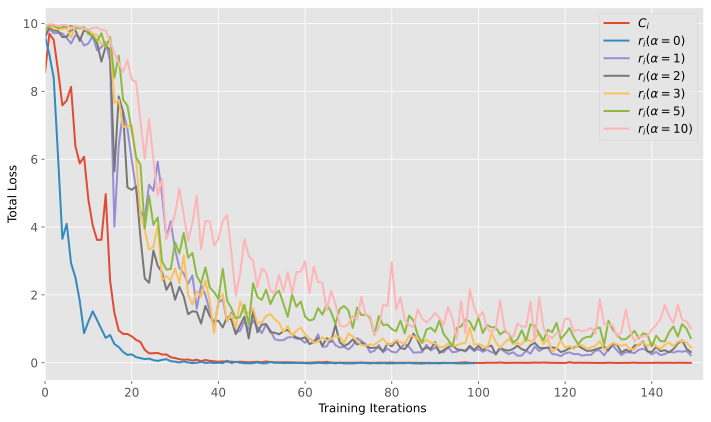

In [71]:
import matplotlib.pyplot as plt

os.makedirs(path_to_save_vf_data, exist_ok=True)
bbox_to_anchor=(1, 1)

xlim = 250
line_width = 2
new_labels = [
    '$C_i$',
    r'$r_i(\alpha=0)$',
    r'$r_i(\alpha=1)$',
    r'$r_i(\alpha=2)$',
    r'$r_i(\alpha=3)$',
    r'$r_i(\alpha=5)$',
    r'$r_i(\alpha=10)$',
]

# Create and save the first plot
plt.figure(figsize=figsize)
plt.plot(losses_agent_1, label=new_labels, linewidth=line_width)
plt.legend(fontsize='12', loc='upper right', bbox_to_anchor=bbox_to_anchor)
plt.xlabel(r'Training Iterations ', fontsize=12)
plt.xlim([0,152])
plt.ylabel('Total Loss', fontsize=12)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.style.use('ggplot')
plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig(os.path.join(path_to_save_total_loss_data,  "all_alpha_values", '1.pdf'), dpi=10000)
plt.show()
plt.close()

# Create and save the second plot
plt.figure(figsize=figsize)
plt.plot(losses_agent_2, label=new_labels, linewidth=line_width)
plt.legend(fontsize='12', loc='upper right', bbox_to_anchor=bbox_to_anchor)
plt.xlabel(r'Training Iterations ', fontsize=12)
plt.xlim([0,152])
plt.ylabel('Total Loss', fontsize=12)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.style.use('ggplot')
plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig(os.path.join(path_to_save_total_loss_data,  "all_alpha_values",  '2.pdf'), dpi=10000)
plt.show()
plt.close()

# Create and save the third plot
plt.figure(figsize=figsize)
plt.plot(losses_agent_5, label=new_labels, linewidth=line_width)
plt.legend(fontsize='12', loc='upper right', bbox_to_anchor=bbox_to_anchor)
plt.xlabel(r'Training Iterations ', fontsize=12)
plt.ylabel('Total Loss', fontsize=12)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.style.use('ggplot')
plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig(os.path.join(path_to_save_total_loss_data,  "all_alpha_values", '5.pdf'), dpi=10000)
plt.xlim([0,152])
plt.show()
plt.close()

# Create and save the fourth plot
plt.figure(figsize=figsize)
plt.plot(losses_agent_6, label=new_labels, linewidth=line_width)
plt.legend(fontsize='12', loc='upper right', bbox_to_anchor=bbox_to_anchor)
plt.xlabel(r'Training Iterations ', fontsize=12)
plt.xlim([0,152])
plt.ylabel('Total Loss', fontsize=12)
plt.grid(True)
axs.set_xlim([0,152])
plt.tick_params(axis='both', which='major', labelsize=12)
plt.style.use('ggplot')
plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig(os.path.join(path_to_save_total_loss_data, "all_alpha_values", '6.pdf'), dpi=10000)
plt.show()
plt.close()

## Stats analysis - looking at the energies of 2 terms in reward function - at what ratio of energies can we correlate with better overall system performance? 

In [72]:
fixed_tc_df = get_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[0], 
                                eval_dir = "fixed_tc", 
                                csv_file_name='eval_metrics.csv',
                                seed = 10)
trained_0_8_df = get_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[1], 
                                eval_dir = "trained",
                                csv_file_name='eval_metrics.csv',
                                seed = 10)

In [73]:
import matplotlib.pyplot as plt
import pandas as pd
type((fixed_tc_df['1_accumulated_waiting_time']/100).diff())

pandas.core.series.Series

perform the transformations on accumulated waiting time

In [74]:
agent_1_fc_accum_wait_group_five = fixed_tc_df['1_accumulated_waiting_time'].groupby(
    fixed_tc_df['1_accumulated_waiting_time'].index // 5).sum()

agent_1_fc_accum_wait_scale_diff = (agent_1_fc_accum_wait_group_five/100).diff()


In [75]:
# cap the series
fixed_tc_diff_capped_array = np.where(agent_1_fc_accum_wait_scale_diff.isna() | (agent_1_fc_accum_wait_scale_diff > 0), 0, agent_1_fc_accum_wait_scale_diff)